# Einführung in künstliche Intelligenz und Machine Learning
---

## Modell for prediction of Rental Bike Usage in the Washington DC Area

| Name | Simon Schmetz |
| --- | --- |
| Email | schmetz@hm.edu |
| Matrikelnummer | 11497718 |

As part of the eletive course "Introduction into Machine Learning and Artificial Intelligence", a practical work on a Data Science challange is to be performed for evaluation. The choosen challange in this case, is the prediction of usage for a rental bike service in Washington DC, inspired by the kaggel Bike Sharing Demand challange (https://www.kaggle.com/c/bike-sharing-demand). The available Data consists of weather and rental Data for the years 2011 and 2012. While the weather data is available for the entirety of that timespan, the usage data is only available for the first 19 days of each month. These first 19 Days of each month can therefor be used to train and test prediction Models, while the remaining days in each month are to be predicted with the greatest possible accuracy as the solution to the challange.

Due to a repetetive nature of some steps in the processes of Datapreperation, Visualization and Model Scoring, multiple functions have been defined, automating and streamlining parts of the workflow and Model development. Due to the existence of detailed commentary included in the code, no further explonation for the given functions shall be given. In between the coding blocks, the overall task, goal and result of the given blocks and Steps in the process of data preperation and model development is explained. For indepth details on the technical reaslisation, detailed comentary inside the code is available in this case as well.

The actual work on the data and models after initializing the functions and importing the libraries used throughout the task.

In [138]:
#Initial Imports and function definitions

import requests #For direct import of Data

#Initial Imports 
import matplotlib.pyplot as plt #Visualization Lib
import seaborn as sns; sns.set(); #Data visualization Lib
import numpy as np #Scientific cumputing package, Array management
import pandas as pd
import datetime

from cProfile import label
from matplotlib.legend import _get_legend_handles_labels


from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import learning_curve
from sklearn.pipeline import make_pipeline

from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split


from locale import normalize
from sklearn.metrics import mean_squared_log_error, mean_absolute_error,mean_squared_error, mean_absolute_percentage_error

#Defining Functions

#Import of test and train data
def import_data():
    df_train = pd.read_csv('bike-sharing-demand/train.csv')
    df_test = pd.read_csv('bike-sharing-demand/test.csv')

    return df_train, df_test


#Add daytimes frome datetime
def add_daytimes(df):
    df['datetime'] = pd.to_datetime(df['datetime'])

    df['year'] = df['datetime'].dt.year
    df['month'] = df['datetime'].dt.month
    df['day'] = df['datetime'].dt.day
    df['hour'] = df['datetime'].dt.hour
    df['weekday'] = df['datetime'].dt.weekday
    return df


#Evaluate mean squared Error score, mean absolute erro & mean absolute percantage error
def scoring (y_test, y_pred):

    #normalizing/scaling series on max-min Scale
    y_test_norm = y_test #(y_test - y_test.min()) / (y_test.max() - y_test.min())
    y_pred_norm = y_pred # (y_pred - y_pred.min()) / (y_pred.max() - y_pred.min())


    #calc scores
    MSE = mean_squared_error(y_test_norm,y_pred_norm)
    MAE = mean_absolute_error(y_test_norm,y_pred_norm)
    errorpercantage = mean_absolute_percentage_error(y_true = y_test_norm,y_pred = y_pred_norm)
    #RMSLE = mean_squared_log_error(y_test_norm, y_pred_norm, squared=False)

    #print scores
    print('Mean Squared Error Score:',MSE)
    print('Mean Absolute Error Score:',MAE)
    print('Average Errorpercantage:',errorpercantage*100, '%')
    #print('Root Mean Squared log Error', RMSLE)
    print('\n')

    return MSE, MAE, errorpercantage;


#learncurve function
def lcurve(estimator,x_data, y_data, train_sizes):
    print('Learning Curve')
    
    #Learncurve generation
    train_sizes = train_sizes
    train_sizes, train_scores, test_scores = learning_curve(estimator,x_data,y_data, train_sizes = train_sizes, random_state=0)
    train_scores_mean = np.mean(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)

    #Plotting
    plt.plot(train_sizes, train_scores_mean, color = 'blue', label = 'Training Score')
    plt.plot(train_sizes, test_scores_mean, color = 'red', label = 'Test Scores')
    plt.hlines(np.mean([train_scores[-1], test_scores[-1]]), train_sizes[0], train_sizes[-1], color='gray', linestyle='dashed') # Convergence Line
    plt.xlabel("Training Size")
    plt.ylabel("Score")
    plt.legend(loc='best')
    plt.show()
    
    print('Training score of max training size:', train_scores_mean[-1])
    print('Test score of max training size:', test_scores_mean[-1])


#polynomial regression function
def PolynomialRegression(degree=2, **kwargs):
    return make_pipeline(PolynomialFeatures(degree),
                         LinearRegression(**kwargs))


#Visualize features over count as scatter plots and pointplots
def pred_pair_visualization(x_test,y_test,y_pred, features, fig_collums):
    


    #Scatter Pltos
    print('\nComparison Scatter plots')
    #set up blank figure 
    feature_count = len(features)
    fig_rows = round((feature_count/4)+0.4)
    fig, ax = plt.subplots(fig_rows,fig_collums, figsize = (5*fig_collums,6*fig_rows))
    fig.subplots_adjust(left=0.0625, right=0.95, wspace=0.25)
    
    #create counters for figures
    n = 0 #rows
    j = 0 #collums

    
    for feature in features:
        #creat plots
        ax[j,n].scatter(x_test[feature], y_test, c = 'blue',label='Test Data')
        ax[j,n].scatter(x_test[feature], y_pred, c = 'red',label='Prediction Data') 

        #labels
        ax[j,n].set_xlabel(feature)
        ax[j,n].set_ylabel("Bike Rental Count") 
        
        #iterate counters 
        n = n+1
        if n % 4 == 0:
            j = j+1
            n = 0

    df_res = x_test.copy()
    df_res['Count Test Data'] = y_test
    df_res['Count Predicted Data'] = y_pred

    #display(df_res.head())

    print('Pointplots')
    for feature in ['weather','season','holiday','workingday','month']:
        

        plt.figure(figsize= (23,6))
        #Test Data
        sns.set_palette(sns.color_palette("Blues"))
        sns.pointplot(x = 'hour' ,y = 'Count Test Data', data= df_res, hue= feature,label = 'Test Data')
        
        #Predicted Data
        sns.set_palette(sns.color_palette("Reds"))
        sns.pointplot(x = 'hour' ,y = 'Count Predicted Data', data= df_res, hue= feature,linestyles='--', label = 'Predicted Data')

        #feature_name = str(feature)
        plt.title(feature)
        plt.ylabel('Bicycle Rental Count')
        plt.legend(ncol=2)
        plt.show()





## Data Analysis and intital Observations

With the initial functions defined, the mata consisting of the training (first 19 days of each month) and test data (remaining days of each month) is imported as two seperate dataframes. As a first review of the Data, the first rows and some overall information including the data types of the variables are printed to get a first impression of the available data and datastructure. Notable is that at this point the date and time are only available as datetime objects. 

In [139]:
#Import Data
df_train, df_test = import_data()

#Display train data attributes 
print('Training Data')
display(df_train.head())
display(df_train.info())

#Display train data attributes 
print('Test Data')
display(df_test.head())
display(df_train.info())

Training Data


datetime  season  holiday  workingday  weather  temp   atemp  \
0  2011-01-01 00:00:00       1        0           0        1  9.84  14.395   
1  2011-01-01 01:00:00       1        0           0        1  9.02  13.635   
2  2011-01-01 02:00:00       1        0           0        1  9.02  13.635   
3  2011-01-01 03:00:00       1        0           0        1  9.84  14.395   
4  2011-01-01 04:00:00       1        0           0        1  9.84  14.395   

   humidity  windspeed  casual  registered  count  
0        81        0.0       3          13     16  
1        80        0.0       8          32     40  
2        80        0.0       5          27     32  
3        75        0.0       3          10     13  
4        75        0.0       0           1      1

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


None

Test Data


datetime  season  holiday  workingday  weather   temp   atemp  \
0  2011-01-20 00:00:00       1        0           1        1  10.66  11.365   
1  2011-01-20 01:00:00       1        0           1        1  10.66  13.635   
2  2011-01-20 02:00:00       1        0           1        1  10.66  13.635   
3  2011-01-20 03:00:00       1        0           1        1  10.66  12.880   
4  2011-01-20 04:00:00       1        0           1        1  10.66  12.880   

   humidity  windspeed  
0        56    26.0027  
1        56     0.0000  
2        56     0.0000  
3        56    11.0014  
4        56    11.0014

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


None

In addition to the printed information, some definitions where given as part of the kaggel challange, being described as follows:

|Variable|Definition/Comment|
|---|---|
|datetime | hourly date + timestamp|
| season | 1 = spring, 2 = summer, 3 = fall, 4 = winter |
|holiday | whether the day is considered a holiday|
|workingday | whether the day is neither a weekend nor holiday|
|weather|1: Clear, Few clouds, Partly cloudy, Partly cloudy|
|        |2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist| 
|        |3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds|
|        |4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog|
|temp | temperature in Celsius |
|atemp|"feels like" temperature in Celsius|
|humidity | relative humidity|
|windspeed | wind speed |
|casual | number of non-registered user rentals initiated|
|registered | number of registered user rentals initiated|
|count | number of total rentals|


To review the limits/bounds of the Variables, the maximum and minimum values for all variables that dont have defined discrete states are reviewed. The resulting limits appear to be within reason. 
Further analysis and a definition of "within reason" based on value distribution should be unneccassary and beyond the scope of this work. 

In [140]:
#Show max and min values to check for out of bounds/unrealistic values
print("Max temperature: ", df_train['temp'].max())
print("Min temperature: ", df_train['temp'].min())
print("Max felt temperature: ", df_train['atemp'].max())
print("Min felt temperature: ", df_train['atemp'].min())
print("Max humidity: ", df_train['humidity'].max())
print("Max windspeed: ", df_train['windspeed'].max())
print("Max casual drivers: ", df_train['casual'].max())
print("Max registered drivers: ", df_train['registered'].max())
print("Max absolut drivers: ", df_train['count'].max())

Max temperature:  41.0
Min temperature:  0.82
Max felt temperature:  45.455
Min felt temperature:  0.76
Max humidity:  100
Max windspeed:  56.9969
Max casual drivers:  367
Max registered drivers:  886
Max absolut drivers:  977


## Visualization

With a basic understanding of the scope and structure of the given Data, the next step is to gain an general understanding of the pattern and correlations. To allow for that, a series of Visualizations is created, depicting different dependencies. To make those visualizations and their labling more intuitive, the numeric states are replaced by their according descriptive strings. 

In [141]:
#feature Engineering to improve visualization

#Split datetime in individual Variables
add_daytimes(df_train)

#naming function
def name_features(df):
    #name season
    df['season'] = df['season'].map({1: 'Spring', 2: 'Summer', 3: 'Fall', 4: 'Winter'})
    #name weather
    df['weather'] = df['weather'].map({
        1: 'Clear, Few clouds, Partly cloudy, Partly cloudy', 
        2: 'Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist', 
        3: 'Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds', 
        4: 'Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog'
        })

    #name weekdays
    df['weekday'] = df['datetime'].dt.weekday


    return df

#Name features in training set for Visualization
df_train = name_features(df_train)

#Add Datetime in test set for analysis
add_daytimes(df_test)

#Show resulting Dataframes
display(df_train.head())
display(df_test.head())

datetime  season  holiday  workingday  \
0 2011-01-01 00:00:00  Spring        0           0   
1 2011-01-01 01:00:00  Spring        0           0   
2 2011-01-01 02:00:00  Spring        0           0   
3 2011-01-01 03:00:00  Spring        0           0   
4 2011-01-01 04:00:00  Spring        0           0   

                                           weather  temp   atemp  humidity  \
0  Clear, Few clouds, Partly cloudy, Partly cloudy  9.84  14.395        81   
1  Clear, Few clouds, Partly cloudy, Partly cloudy  9.02  13.635        80   
2  Clear, Few clouds, Partly cloudy, Partly cloudy  9.02  13.635        80   
3  Clear, Few clouds, Partly cloudy, Partly cloudy  9.84  14.395        75   
4  Clear, Few clouds, Partly cloudy, Partly cloudy  9.84  14.395        75   

   windspeed  casual  registered  count  year  month  day  hour  weekday  
0        0.0       3          13     16  2011      1    1     0        5  
1        0.0       8          32     40  2011      1    1     1        5  
2        0.0       5          27     32  2011      1    1     2        5  
3        0.0       3          10     13  2011      1    1     3        5  
4        0.0       0           1      1  2011      1    1     4        5

datetime  season  holiday  workingday  weather   temp   atemp  \
0 2011-01-20 00:00:00       1        0           1        1  10.66  11.365   
1 2011-01-20 01:00:00       1        0           1        1  10.66  13.635   
2 2011-01-20 02:00:00       1        0           1        1  10.66  13.635   
3 2011-01-20 03:00:00       1        0           1        1  10.66  12.880   
4 2011-01-20 04:00:00       1        0           1        1  10.66  12.880   

   humidity  windspeed  year  month  day  hour  weekday  
0        56    26.0027  2011      1   20     0        3  
1        56     0.0000  2011      1   20     1        3  
2        56     0.0000  2011      1   20     2        3  
3        56    11.0014  2011      1   20     3        3  
4        56    11.0014  2011      1   20     4        3

With these cosmetic changes done, thes first type of vizualization is created. Barplots are displayed to show a central tendency of the bike rentals in correlation to the available data, with errobars to display uncertainty.

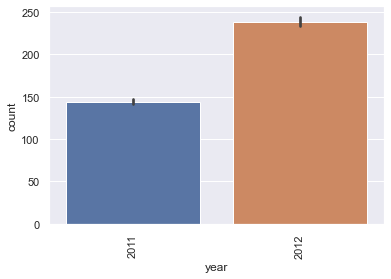

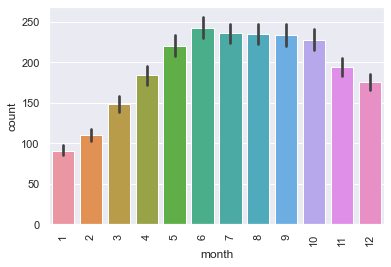

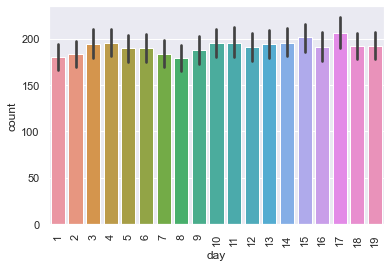

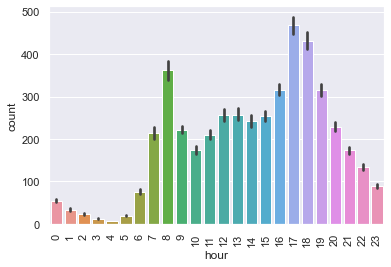

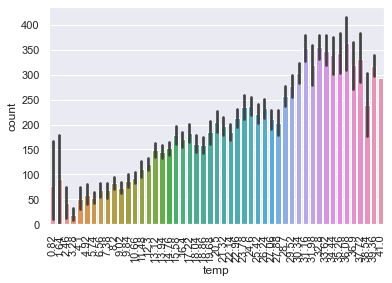

In [142]:
for feature in ['year', 'month', 'day', 'hour','temp']:
    sns.barplot(x = feature, y = 'count', data = df_train)
    plt.xticks(rotation=90)
    plt.show()

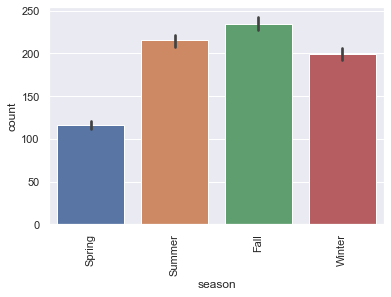

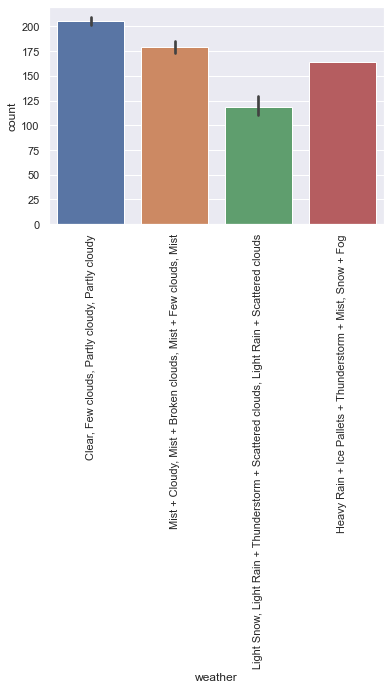

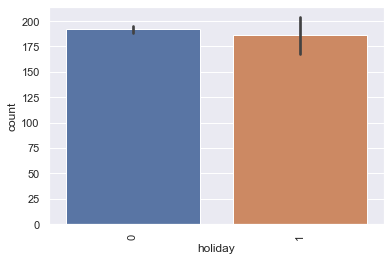

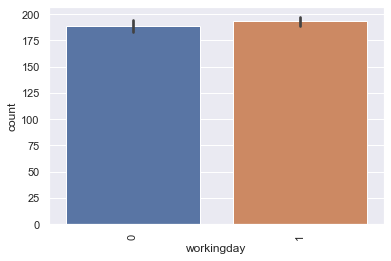

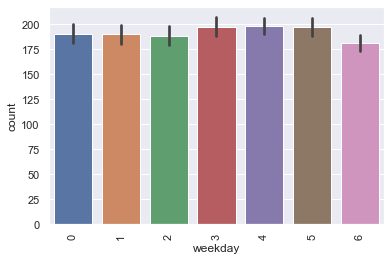

In [143]:

for feature in ['season', 'weather', 'holiday','workingday','weekday'] : 
    sns.barplot(x = feature, y = 'count', data = df_train)
    plt.xticks(rotation=90)
    plt.show()

The barplots allow to observe some first intuitive patterns, like a usage increas in summer months and in higher temperature, as well as two usage peaks over an average day around rush hour times. Interisting is the apparently high usage for the worst weather condition (heavy rain, [...]). That high usage is combined with a missing errorbar leads to some closer investigation. The search for the cases of heavy rain [...] shows that only one hour in the entire training data has that weather condition. Since the test data does not have a single case of heavy rain [...], an argument could be made, that it would not interfere with the spicifc given task to predict for that specific training data. Since in future use, the model might be applied to predict cases where this might be more important, the decision is made to remove that single datapoint. That step will be performed in the data preperation later on.

In [144]:
print('Cases of Heavy rain in training data:',df_train[df_train['weather'] ==  'Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog'].count()['count'])
print('Cases of Heavy rain in test data:',df_test[df_test['weather'] ==  'Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog'].count()['weather'])

Cases of Heavy rain in training data: 1
Cases of Heavy rain in test data: 0


The second visualization type created are multiple pointplots, adding a third dimension to the daily hourly usage. That way the differences in daily usage for different weathers, seasons etc. are intuitively apparent. Interisting is to look at the different behaviour between working days and none working day, showing the lack of rush hour and a more distributed usage over the midday of probably leisurely rentals. Apart from that the logical connection between seasons and weather with corresponding increase and decrease in rentals can be observed. 

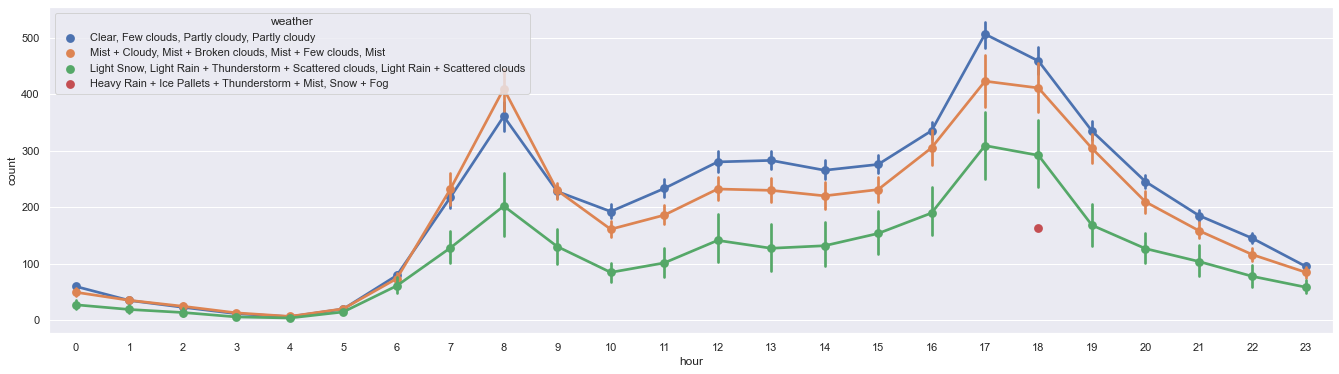

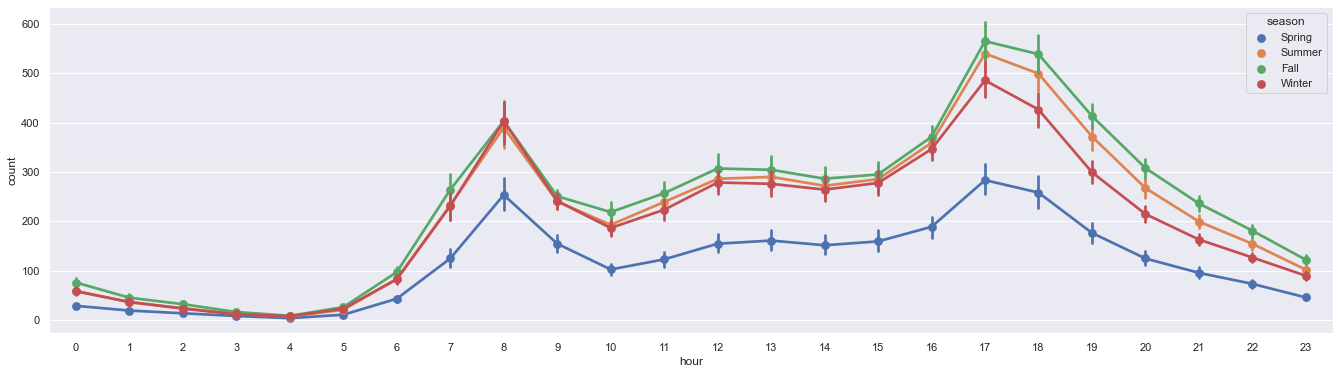

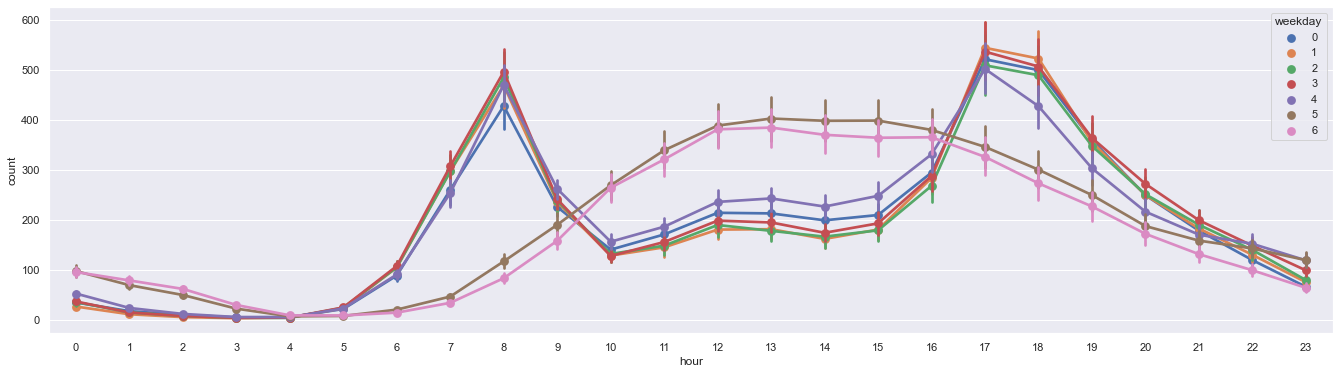

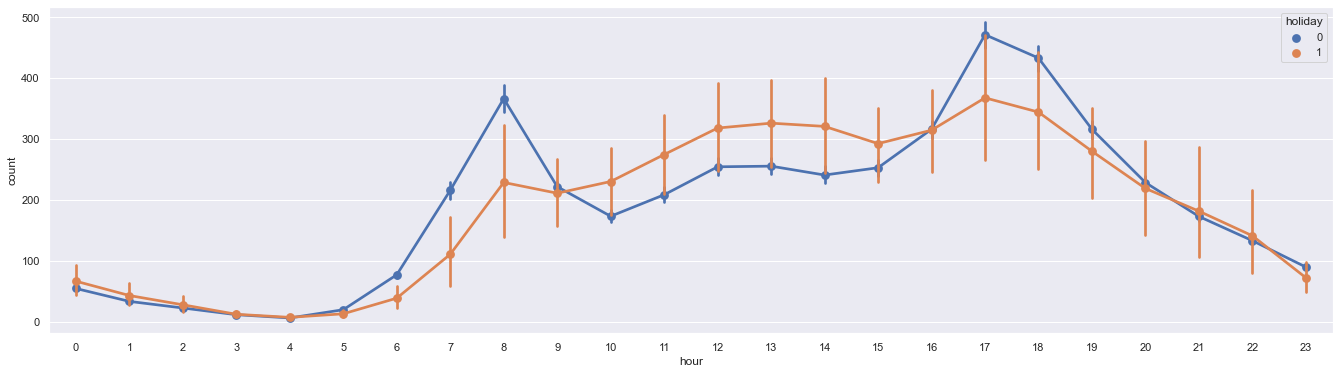

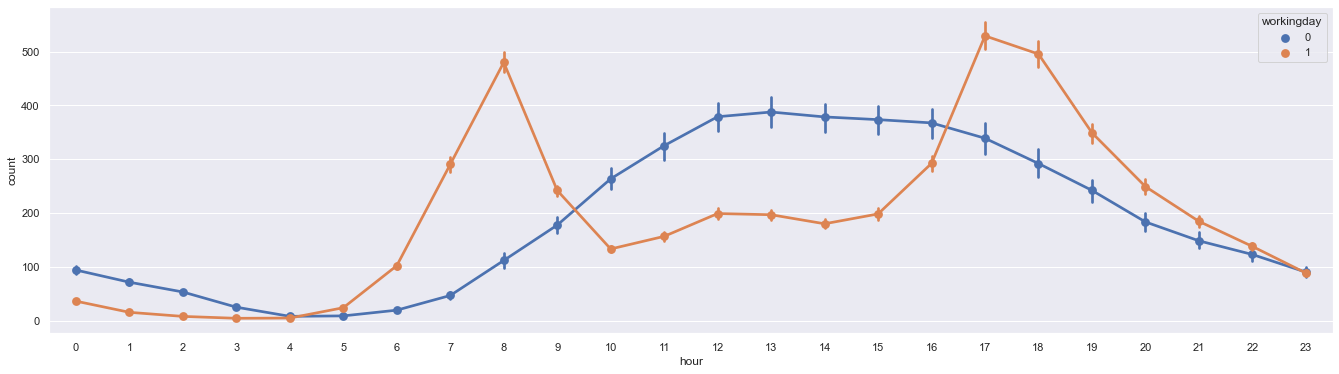

KeyboardInterrupt: 

In [145]:
for feature in ['weather','season','weekday','holiday','workingday','month']:
    plt.figure(figsize= (23,6))
    sns.pointplot(x = 'hour',y = 'count', data= df_train, hue= feature)
    plt.show()
    

For a broader Idea on how occurence for different amounts of rentals is distributed, a histogram plot is created.

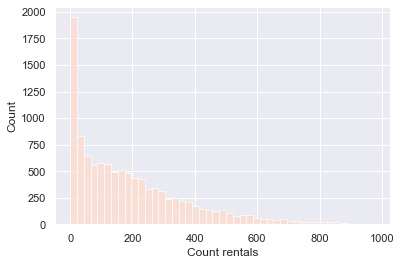

In [ ]:
fig = sns.histplot(data=df_train, x="count")
fig.set(xlabel='Count rentals')
plt.show()

To help understand interdependencies between the different variables, a correlation heatmap is created. There are some ovious correlations like between felt temperature atemp and actual temperature that can be observed, as well as a higher correlation between casual (probably more leisurely rentals) and the temperature compared to registered rentals.  

<AxesSubplot:>

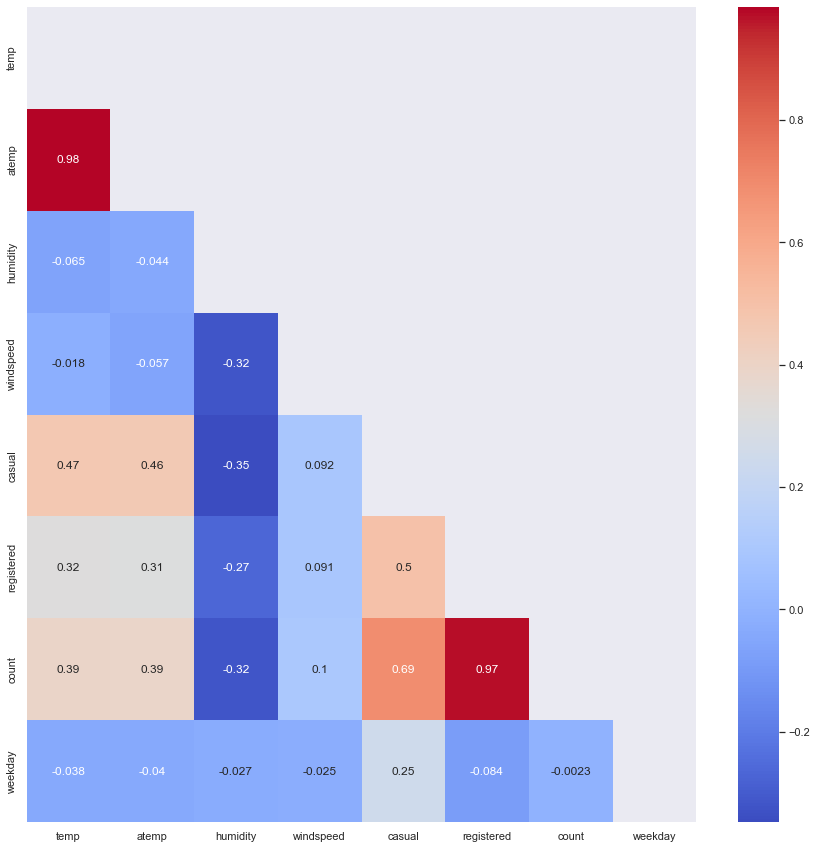

In [ ]:
#Correlation heatmap 
#Standard Correlation used: Pearson Correlation Coefficient
df_train_corr = df_train.drop(columns=['workingday','holiday','year','month','day','hour'])
plt.figure(figsize= (15,15))
sns.heatmap(df_train_corr.corr(), annot=True, cmap= 'coolwarm', mask = np.triu(df_train_corr.corr()))


The same information, but considerably less intuitive can be drawn from the pairplotting of all the variables. Where specifically the correlation between felt and actual temperature is apparent. However in this visualization, some anomalies can be discovered. For once, there seem to appare some holes in the distribution of data (like humidity over atemp), for which no explonation has to been found to this date. In addition to that, there seems to exist a high ammount of windspeed = 0 data. Because of the quantity of data apearing to exhibit windspeed = 0, additional investigation is done in the next step. 

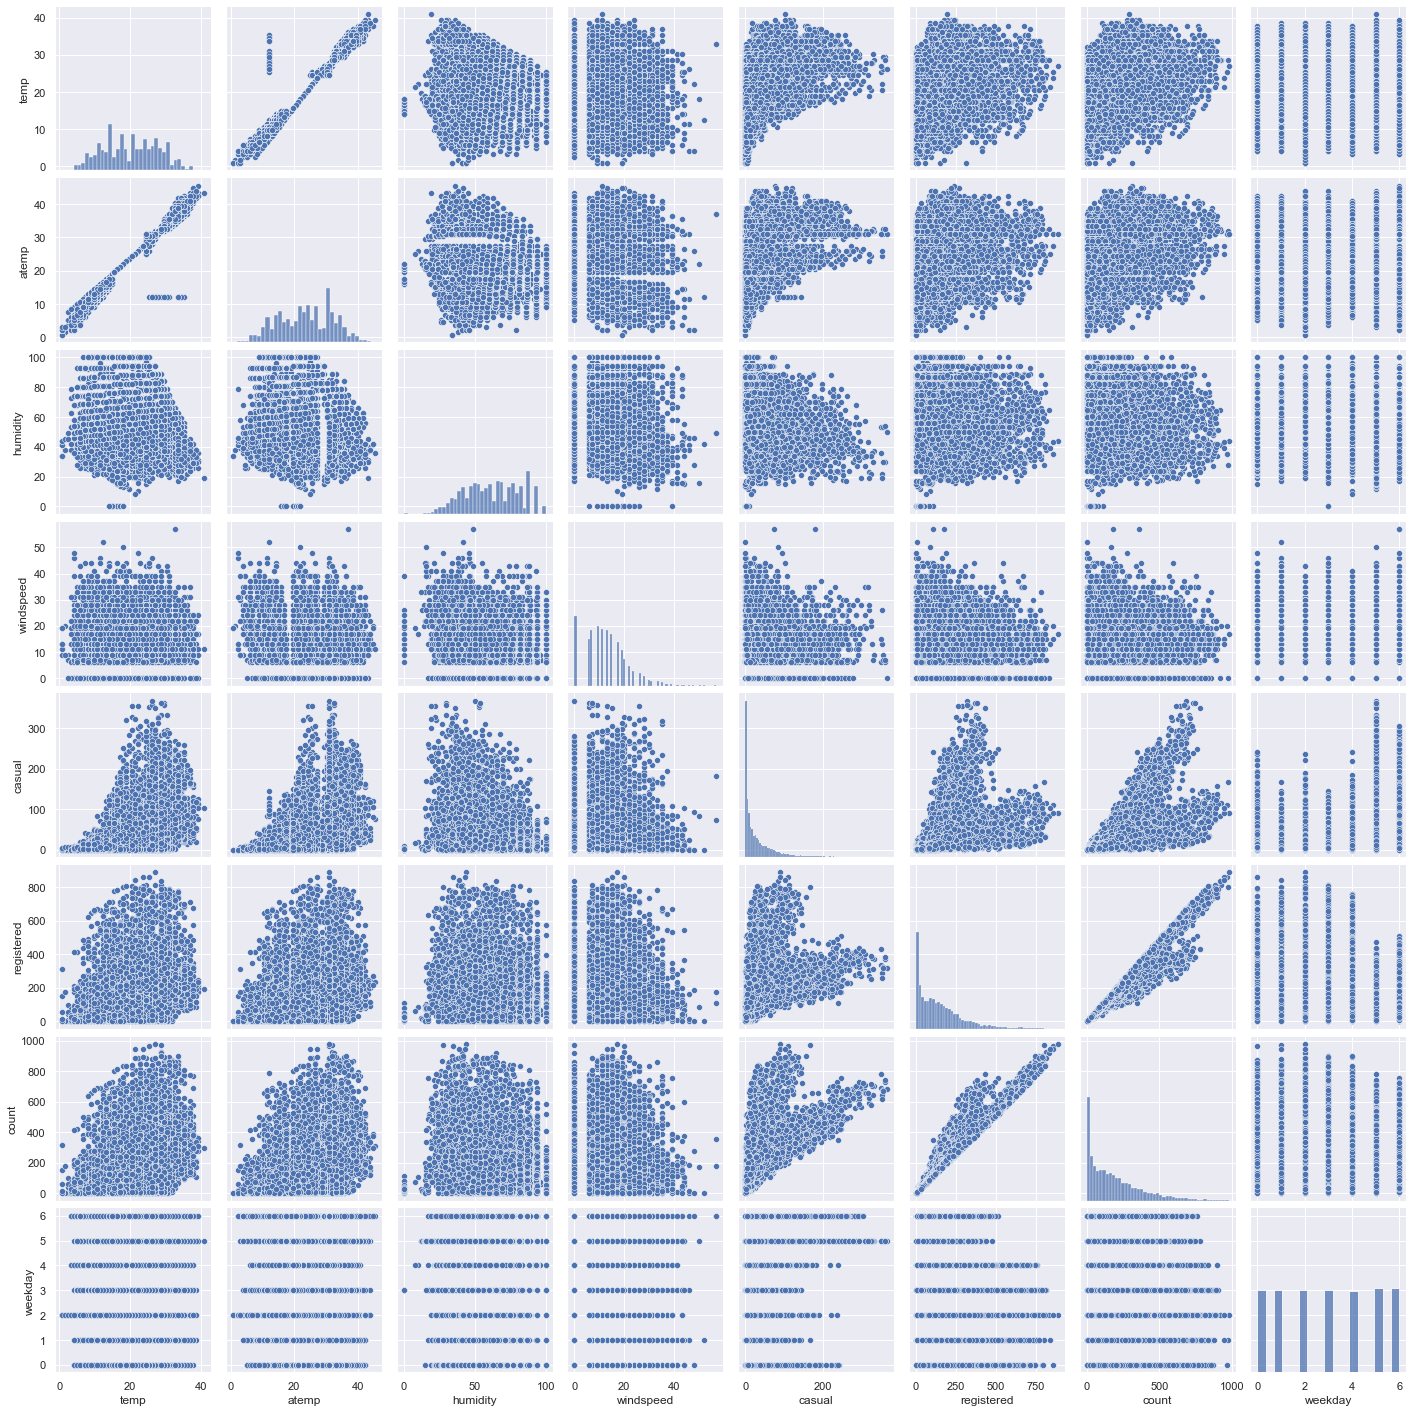

In [ ]:
sns.pairplot(df_train_corr)

To do so, a histogram plot of the windspeed count distribution was performed. The resulting 1313 cases in the training data and 867 cases in the test data of windspeed = 0 do not correspond to the general data available through weather statistics (https://www.meteoblue.com/en/weather/historyclimate/climatemodelled/washington-d.c._united-states_4140963) showing very few cases of windspeed = 0 for the same timespan. Thus the assumption of an errorsome or incomplete Dataset is made. 

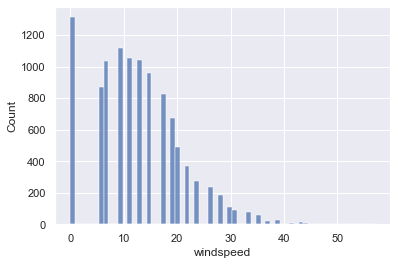

In [ ]:
windspeed0_count_train = (df_train['windspeed']==0).sum()
print('Occcurence of hours in which windspeed = 0 in train data:',windspeed0_count_train)

windspeed0_count_test = (df_test['windspeed']==0).sum()
print('Occcurence of hours in which windspeed = 0 in test data:',windspeed0_count_test)

sns.histplot(data=df_train, x="windspeed")
plt.show()

## Feature engineering & Data Preperation (Fill missing Wind Data)

Before the actual model fitting, evaluation and choosing, the data will now be prepeared and some feature engineering performed. 
Because of the assumed to be missing wind data, a big part of feature engineering revolves around trying to replace the assumed to be missing windspeed data. To do so, four selected models will be trained on the available data and their performance compared. The best performing model will be then used to fill up the assumed to be missing wind data. The hypothosis underlying the decision to add that windspeed data is that the error that will occure by predicting all the assumed to be missing windspeeds, is smaller than that of using the large quantaties of windspeed equal to zero datapoints. Since both the test and the training datasets contain instances of windspeed equal to zero, for this model creation they are resorted into the new windspeed based seperation. Maning they are sorted in seperate sets with the test data being without windspeeds equal zero, and the enhanced training dataset with the windspeeds equal zero. To perform the model evaluation, the training set is then split again to take out test data for the model evaluation. After these preperation steps, a random forest regressor, a decision tree regressor, a linear regressor and a polynomial regressor model of third degree are trained and evaluated with a scoring function incorporating a variety of score types. To give a more intuitive feel of the models behaviours, paiplots are added to show the comparison in spread of data between training and test data. Based on these evaluation aids, a decision is made on which model to use. 

Random Forest Regressor
Mean Squared Error Score: 22.917455724149615
Mean Absolute Error Score: 3.6012761049449016
Average Errorpercantage: 29.406233063158556 %


Decision Tree Regressor
Mean Squared Error Score: 42.71861934088973
Mean Absolute Error Score: 4.521531662489557
Average Errorpercantage: 36.08331567462186 %


Linear Regressor
Mean Squared Error Score: 39.89705222286063
Mean Absolute Error Score: 5.001262150246935
Average Errorpercantage: 42.48671482891591 %


Polynomial Regressor of the degree 3
Mean Squared Error Score: 29.076388017116095
Mean Absolute Error Score: 4.140051094247577
Average Errorpercantage: 34.588530550618444 %




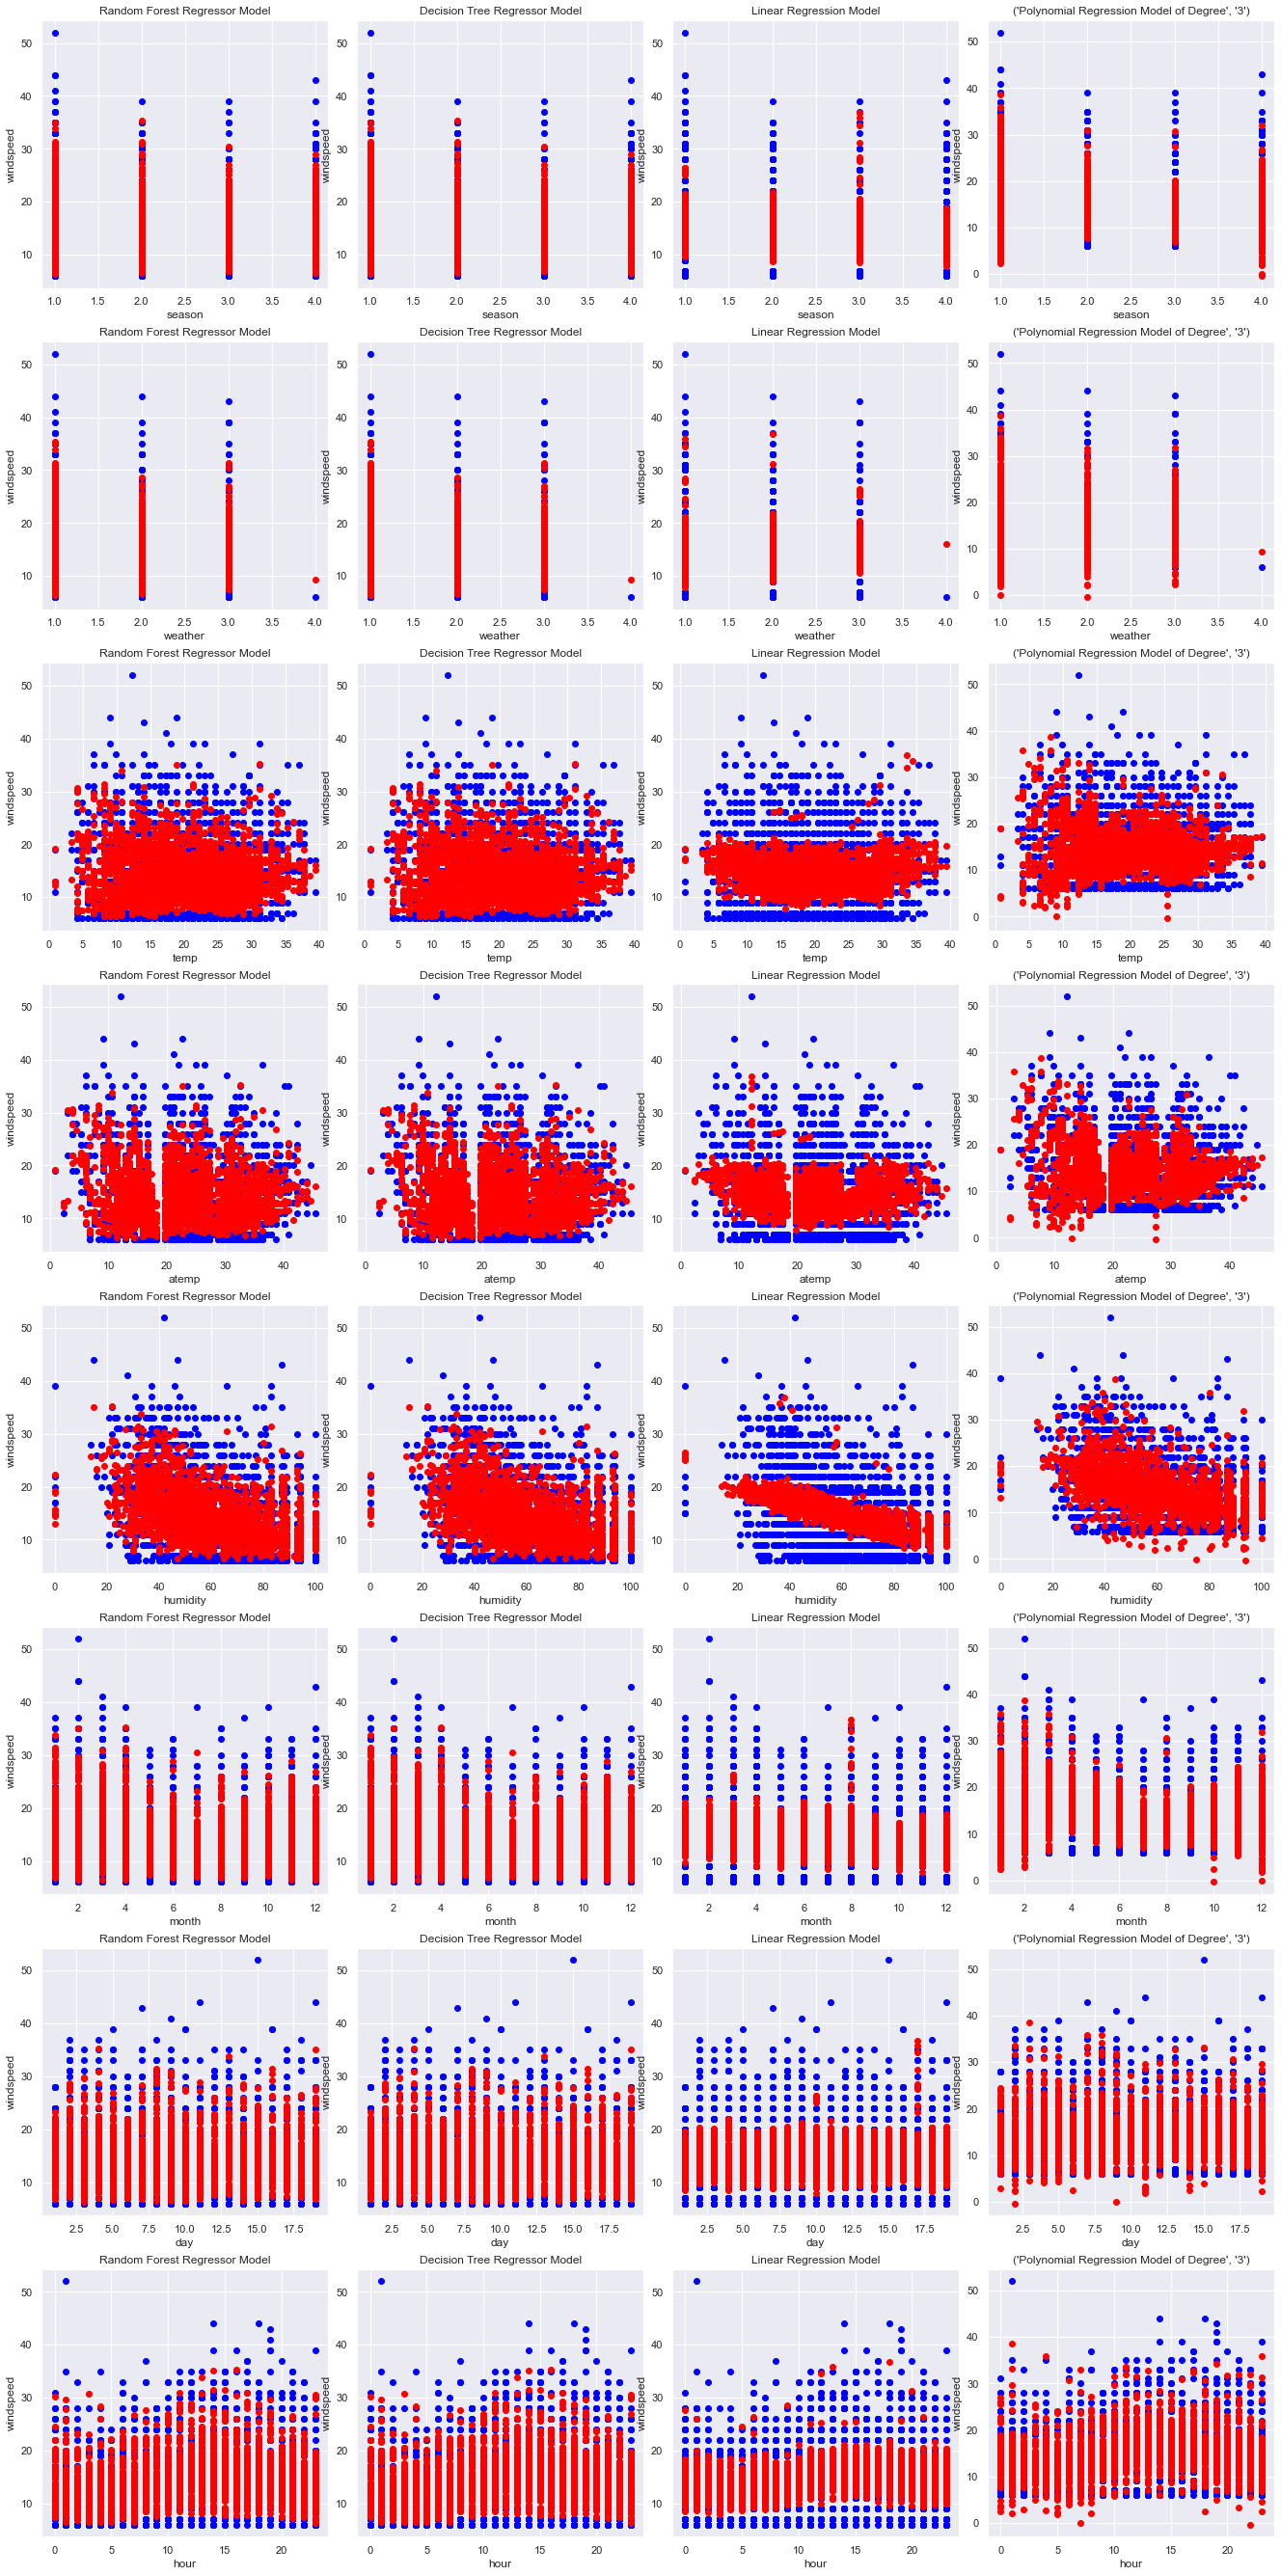

In [ ]:
# Merge train and test Data to train Windfill Model
df_train, df_test = import_data()

#Add daytimes from datetime
add_daytimes(df_train)
add_daytimes(df_test)


df = df_train

#sort into Windspeed = 0/Windspeed not = 0
wind_0 = df[df['windspeed'] == 0]
wind_not0 = df[df['windspeed'] != 0]

y_wind_not0= wind_not0['windspeed']
x_wind_not0 = wind_not0[['season','weather' ,'temp', 'atemp', 'humidity', 'month','day','hour']]

x_wind_train, x_wind_test, y_wind_train, y_wind_test = train_test_split(x_wind_not0,y_wind_not0,test_size=0.25,random_state=0)


#print('\n', x_wind_train.head())
#print('\n',y_wind_train.head())
#print('\n', x_wind_test.head())
#print('\n',y_wind_test.head())
#print('\n')

#Define Models to be trained
wind_rfregressor = RandomForestRegressor(random_state=0) #Random Forest
wind_dtregressor = DecisionTreeRegressor(random_state=0) #Decision Tree
wind_linearregressor = LinearRegression() #Linear Regression
# -> polynomial regression already defined 

#Train Models
wind_rfregressor.fit(x_wind_train,y_wind_train.astype('int'))
wind_dtregressor.fit(x_wind_train,y_wind_train)
wind_linearregressor.fit(x_wind_train,y_wind_train)

wind_polydegree = 3
wind_polytregressor = PolynomialRegression(wind_polydegree).fit(x_wind_train,y_wind_train)


#Predict  with trained Models for rows: wind = 0 
y_wind_pred_rfregressor = wind_rfregressor.predict(x_wind_test)
y_wind_pred_dtregressor = wind_dtregressor.predict(x_wind_test)
y_wind_pred_linearregressor = wind_linearregressor.predict(x_wind_test)
y_wind_pred_polyregressor = wind_polytregressor.predict(x_wind_test)


#Score Models
print('Random Forest Regressor')
MSE_wind_rfregressor, MAE_wind_rfregressor, errorpercantage_wind_rfregressor =scoring(y_wind_test,y_wind_pred_rfregressor)

print('Decision Tree Regressor')
MSE_wind_dtregressor, MAE_wind_dtregressor, errorpercantage_wind_dtregressor =scoring(y_wind_test,y_wind_pred_dtregressor)

print('Linear Regressor')
MSE_wind_linearregressor, MAE_wind_linearregressor, errorpercantage_wind_linearregressor =scoring(y_wind_test,y_wind_pred_linearregressor)

print('Polynomial Regressor of the degree',wind_polydegree)
MSE_wind_polyregressor, MAE_wind_polyregressor, errorpercantage_wind_polyregressor =scoring(y_wind_test,y_wind_pred_polyregressor)


#Plotting  Results of compared Models

fig, ax = plt.subplots(8,4, figsize = (20,48))
fig.subplots_adjust(left=0.0625, right=0.95, wspace=0.1)
n = 0 #counter for visualization


for feature in ['season','weather' ,'temp', 'atemp', 'humidity', 'month','day','hour']:


    # Plot Rand Forest Regressor Results
    ax[n,0].scatter(x = x_wind_test[feature], y = y_wind_test, color = 'blue')
    ax[n,0].scatter(x = x_wind_test[feature], y = y_wind_pred_rfregressor, color = 'red')
    ax[n,0].set_title('Random Forest Regressor Model')

    #Plot Decision Tree Regressor Results
    ax[n,1].scatter(x = x_wind_test[feature], y = y_wind_test, color = 'blue')
    ax[n,1].scatter(x = x_wind_test[feature], y = y_wind_pred_rfregressor, color = 'red')
    ax[n,1].set_title('Decision Tree Regressor Model')

    #Plot Linear Regressor Results
    ax[n,2].scatter(x = x_wind_test[feature], y = y_wind_test, color = 'blue')
    ax[n,2].scatter(x = x_wind_test[feature], y = y_wind_pred_linearregressor, color = 'red')
    ax[n,2].set_title('Linear Regression Model')

    #Plot Decision Tree Regressor Results
    ax[n,3].scatter(x = x_wind_test[feature], y = y_wind_test, color = 'blue')
    ax[n,3].scatter(x = x_wind_test[feature], y = y_wind_pred_polyregressor, color = 'red')
    titel = 'Polynomial Regression Model of Degree',str(wind_polydegree)
    ax[n,3].set_title(titel)

    #Cosmetics
    ax[n,0].set_xlabel(feature)
    ax[n,1].set_xlabel(feature)
    ax[n,2].set_xlabel(feature)
    ax[n,3].set_xlabel(feature)

    ax[n,0].set_ylabel("windspeed")
    ax[n,1].set_ylabel("windspeed")
    ax[n,2].set_ylabel("windspeed")
    ax[n,3].set_ylabel("windspeed")

    n = n+1
    #Show Iterations

plt.show()




With the training, testing and socring performed, the models now can be compared. It is imediately apparent in the visualizations, that the linear regression model is not able to depict and incorporate the necessary complexity for the problem. The best performing model is the Random Forest Regressor, winning in every metric. Thus the Random Forest is picked for the filling up of the assumed to be missing windspeed datapoints. To do so, the data is importet freshly from the files and preprocessed with the functions developed in the initial visualization and preparation. Then the windspeed equal zero datapoints are filled, this time with all the available data for windspeed not equal zero. 

In [ ]:

# Merge train and test Data to train Windfill Model
df_train, df_test = import_data()

#Add daytimes from datetime
add_daytimes(df_train)
add_daytimes(df_test)

df_merged = pd.concat([df_train, df_test],axis=0)
df_merged.tail()




#Train Model with merged Data
df = df_merged

#Sperate in Wind == 0 and Wind != 0
wind_0 = df[df['windspeed'] == 0]
wind_not0 = df[df['windspeed'] != 0]

#Split training Data (Wind !=0) in features and target value (Windspeed)
y_wind_train= wind_not0['windspeed']
x_wind_train = wind_not0[['season','weather' ,'temp', 'atemp', 'humidity', 'month','day','hour']]

#Train Random Forest Regression Model
wind_rfregressor = RandomForestRegressor(random_state=0)
wind_rfregressor.fit(x_wind_train,y_wind_train)

#Use Model individually for train & test data

df_train.head()
#df_train.tail()

def wind_fill(df):

    print(df.shape[0]) #check row count of df 

    #seperate df in Windspeed == 0 and Windspeed !=0
    df_wind_0 = df[df['windspeed'] == 0]
    df_wind_not0 = df[df['windspeed'] != 0]

    #predict missing Wind Values
    df_wind_0['windspeed'] = wind_rfregressor.predict(df_wind_0[['season','weather' ,'temp', 'atemp', 'humidity', 'month','day','hour']])

    #merge wind = 0 and wind != 0 dataframes 
    df_wind_filled = pd.concat([df_wind_not0,df_wind_0])
    df_wind_filled = df_wind_filled.sort_index()

    #return filled dataframe
    df = df_wind_filled

    print(df.shape[0]) # check row count of df to prevent data loss
    
    return df


#Fill Winddata 
df_train = wind_fill(df_train)
df_test = wind_fill(df_test)


#Check for cases Wind == 0 
print((df_train['windspeed']==0).sum())
print((df_test['windspeed']==0).sum())


10886
10886
6493
6493
0
0


/var/folders/2j/t8d8dcsn1tg5sc8l4kz4_4ch0000gn/T/ipykernel_98067/819229296.py:43: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_wind_0['windspeed'] = wind_rfregressor.predict(df_wind_0[['season','weather' ,'temp', 'atemp', 'humidity', 'month','day','hour']])
/var/folders/2j/t8d8dcsn1tg5sc8l4kz4_4ch0000gn/T/ipykernel_98067/819229296.py:43: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_wind_0['windspeed'] = wind_rfregressor.predict(df_wind_0[['season','weather' ,'temp', 'atemp', 'humidity', 'month','day

In addition to that, the bad weather datapoint (heavy rain) is removed because of reasons discussed in the initial visualization. 

In [ ]:
#throw out bad weather collum due to insuffiecient training data (only 1 occurence)
df_train = df_train.drop(df_train[df_train.weather == 4 ].index)
print(df_train[df_train.weather == 4].count()['count'])

0


With that, the data preperation is ended and the model evaluation and application for the prediction of bike rentals can be begin. 

## Bike Rentals Modell Evaluation

Similarly to the filling up of the assumed to be missing windspeed data, the evaluation of the Models for application with the bike rental predictions is done. That means, different models are trained with the available data and their performance compared by scoreing and visualizing them. However this time, the preprepared data from the data preperation will be used to train the different models. To be able to generate the performance scores later on, some of the training data has to be seperated intitially.

In [ ]:
#Checking prepared data 

display(df_train.head())
display(df_test.head())

features = ['season', 'holiday', 'workingday', 'weather', 'temp', 'atemp','humidity', 'windspeed', 'year','month', 'day', 'hour','weekday']

#split training data for evaluation
x_train_eval, x_test_eval, y_train_eval, y_test_eval = train_test_split(df_train[features],df_train['count'],test_size=0.25,random_state=0)


datetime  season  holiday  workingday  weather  temp   atemp  \
0 2011-01-01 00:00:00       1        0           0        1  9.84  14.395   
1 2011-01-01 01:00:00       1        0           0        1  9.02  13.635   
2 2011-01-01 02:00:00       1        0           0        1  9.02  13.635   
3 2011-01-01 03:00:00       1        0           0        1  9.84  14.395   
4 2011-01-01 04:00:00       1        0           0        1  9.84  14.395   

   humidity  windspeed  casual  registered  count  year  month  day  hour  \
0        81   7.392646       3          13     16  2011      1    1     0   
1        80   7.062671       8          32     40  2011      1    1     1   
2        80   6.602783       5          27     32  2011      1    1     2   
3        75   6.472870       3          10     13  2011      1    1     3   
4        75   6.222960       0           1      1  2011      1    1     4   

   weekday  
0        5  
1        5  
2        5  
3        5  
4        5

datetime  season  holiday  workingday  weather   temp   atemp  \
0 2011-01-20 00:00:00       1        0           1        1  10.66  11.365   
1 2011-01-20 01:00:00       1        0           1        1  10.66  13.635   
2 2011-01-20 02:00:00       1        0           1        1  10.66  13.635   
3 2011-01-20 03:00:00       1        0           1        1  10.66  12.880   
4 2011-01-20 04:00:00       1        0           1        1  10.66  12.880   

   humidity  windspeed  year  month  day  hour  weekday  
0        56  26.002700  2011      1   20     0        3  
1        56  10.489185  2011      1   20     1        3  
2        56  10.089262  2011      1   20     2        3  
3        56  11.001400  2011      1   20     3        3  
4        56  11.001400  2011      1   20     4        3

Then the evaluation can beginn. The models are trained on the remaining training data, then used to predict for the seperated training data and scored against the actual rentals. For this phase, the evaluation is done for the "count" rentals, meaning the absolute rentals without taking into account the differences in casual and registered rentals due to time constraints.
In addition to the already existing scoring function, two additional visualization functions are defined to help gain an understanding of how the models behave. The resulting plots can be seperated in the blue tones showing the acutal data and the red/brownish tones representing the models prediction.  

### Linera Regressor

The first Model that is tested is a linear regression model. Simerlarly to the linear regression model to fill up the assumed to be missing windspeed data, the linear model is again unable to cope with the complexity shown by the datas correlations. That is easily oservable in the bad overall performance in the learning curve and more specifically that even the training score decreases substancially with additional data. The same behaviour is visible in the resulting plots. 

Learning Curve


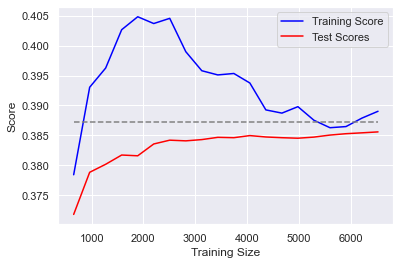

Training score of max training size: 0.38903187075272994
Test score of max training size: 0.3855855930352085
Mean Squared Error Score: 20410.17778876268
Mean Absolute Error Score: 106.61373178413982
Average Errorpercantage: 94.8267226718605 %



Comparison Scatter plots
Pointplots


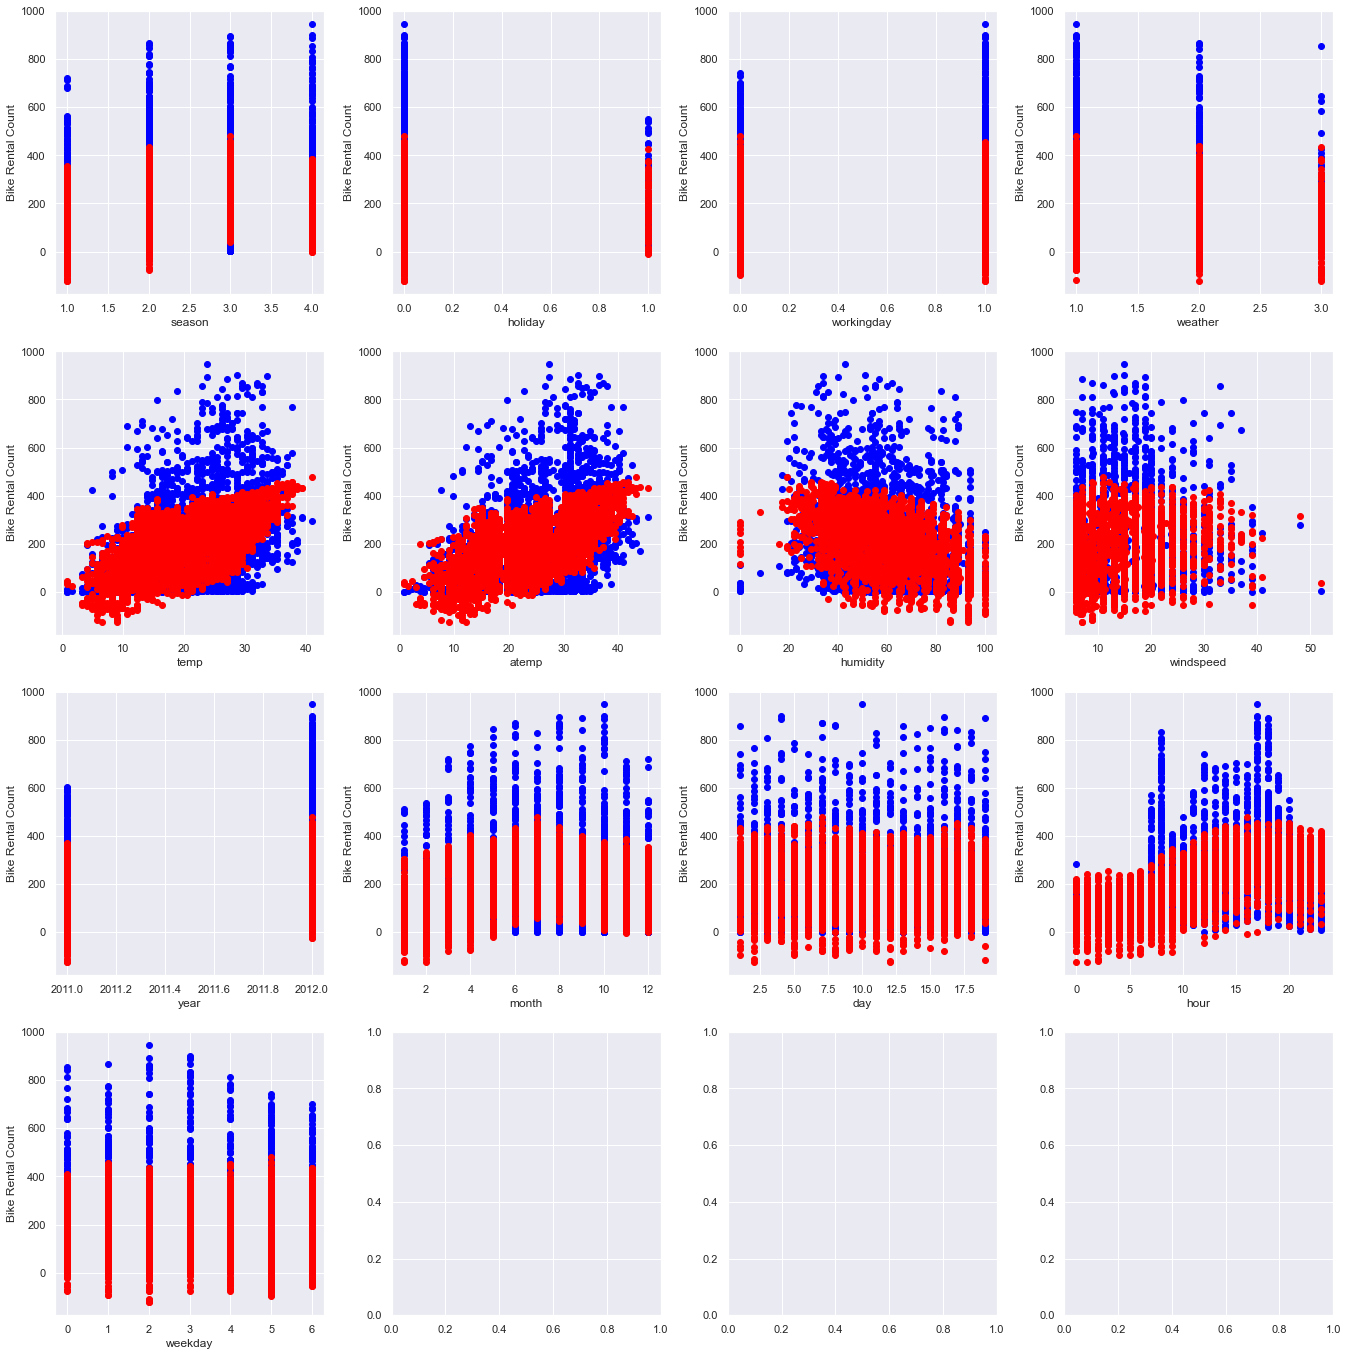

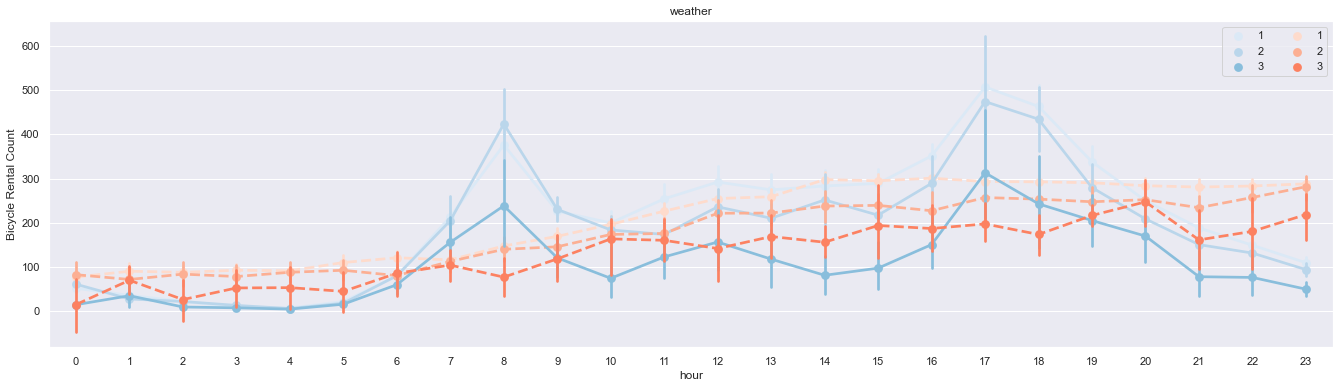

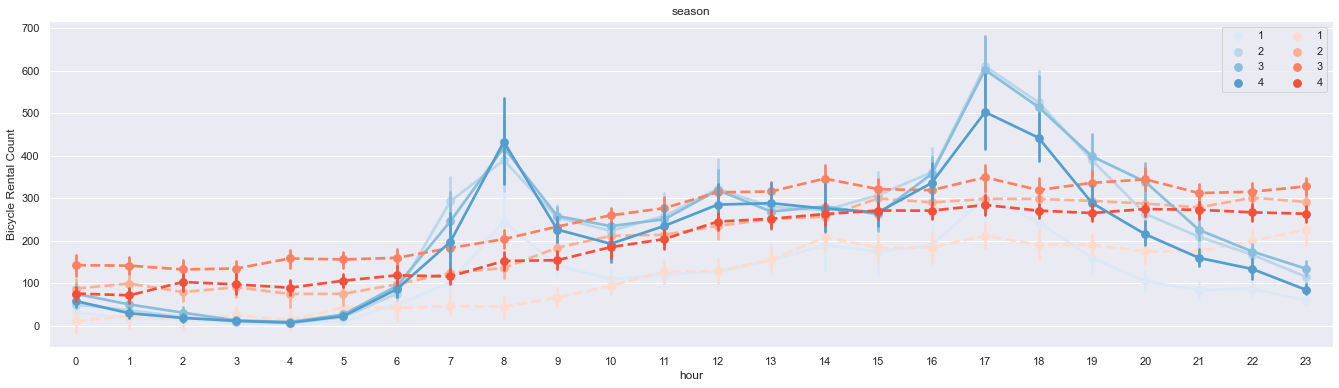

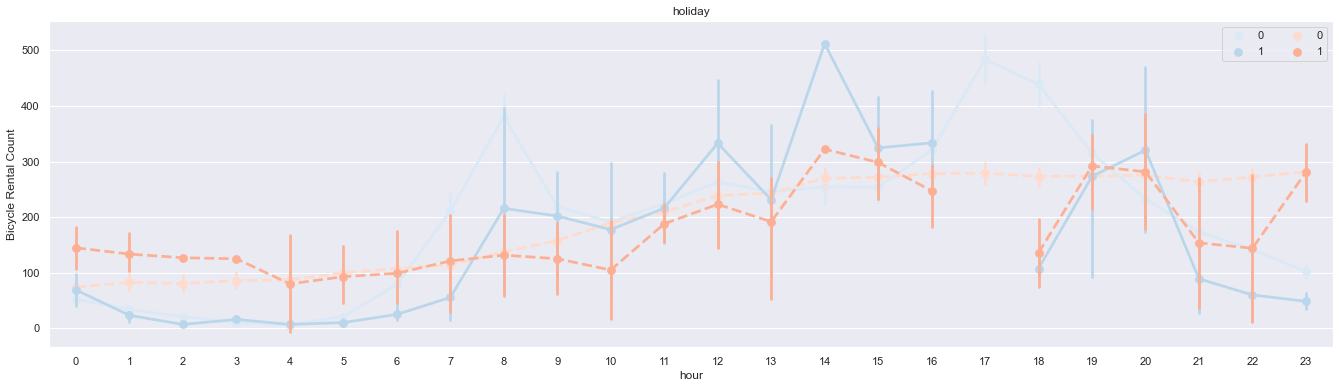

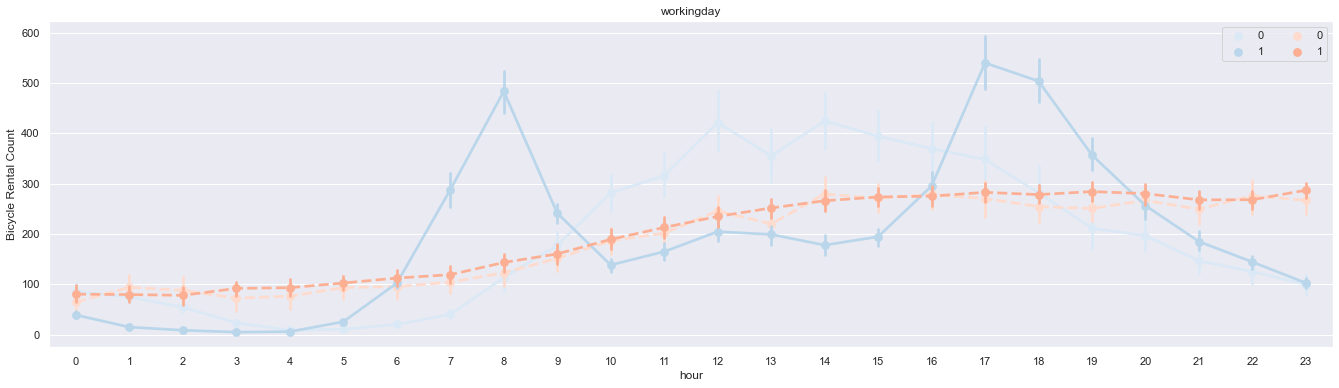

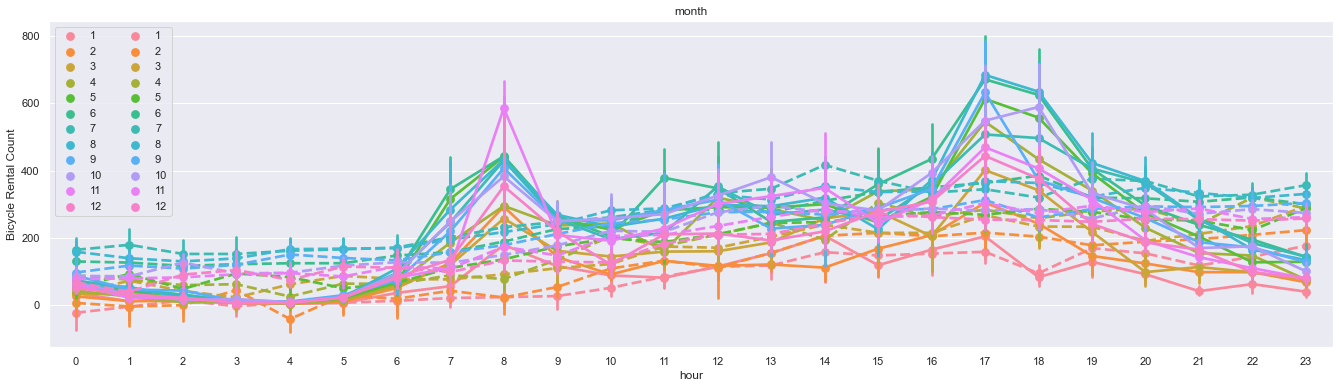

In [ ]:
estimator = LinearRegression()

#Display learning curve
train_sizes = np.linspace(0.1,1,20)
lcurve(estimator,x_train_eval , y_train_eval, train_sizes)

# fit for training data and predict for test data
estimator.fit(x_train_eval,y_train_eval) 
y_pred = estimator.predict(x_test_eval)

#score prediction
scoring(y_pred, y_test_eval)

#visualize prediction
pred_pair_visualization(x_test=x_test_eval,y_test=y_test_eval,y_pred=y_pred,features = features, fig_collums=4)





### Decision Tree Regressor

Moving into an area of more compelx models, next up the Decision Tree Regressor is evaluated. By looking at the learning curve, a overfitting behaviour can be observed in the perfect training score. Meanwhile even though the test score improves with additional data, the improvement decreases over adding new data so that susbtantial performance increases with even more additional data would not have to be expected. At the same time a fairly high erropercantage can be observed, with an avarage 37 % divergence, even though being a considerable improvement from the linear regression model. Furthermore the Decision Tree Regressor is the first model to be able to generally represent the correlations found in the model as shown in the plots. 

Learning Curve


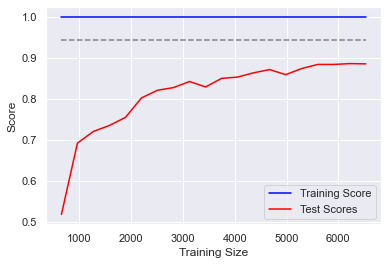

Training score of max training size: 1.0
Test score of max training size: 0.885121029737707
Mean Squared Error Score: 3341.212711241734
Mean Absolute Error Score: 33.44930198383542
Average Errorpercantage: 34.75504838842141 %



Comparison Scatter plots
Pointplots


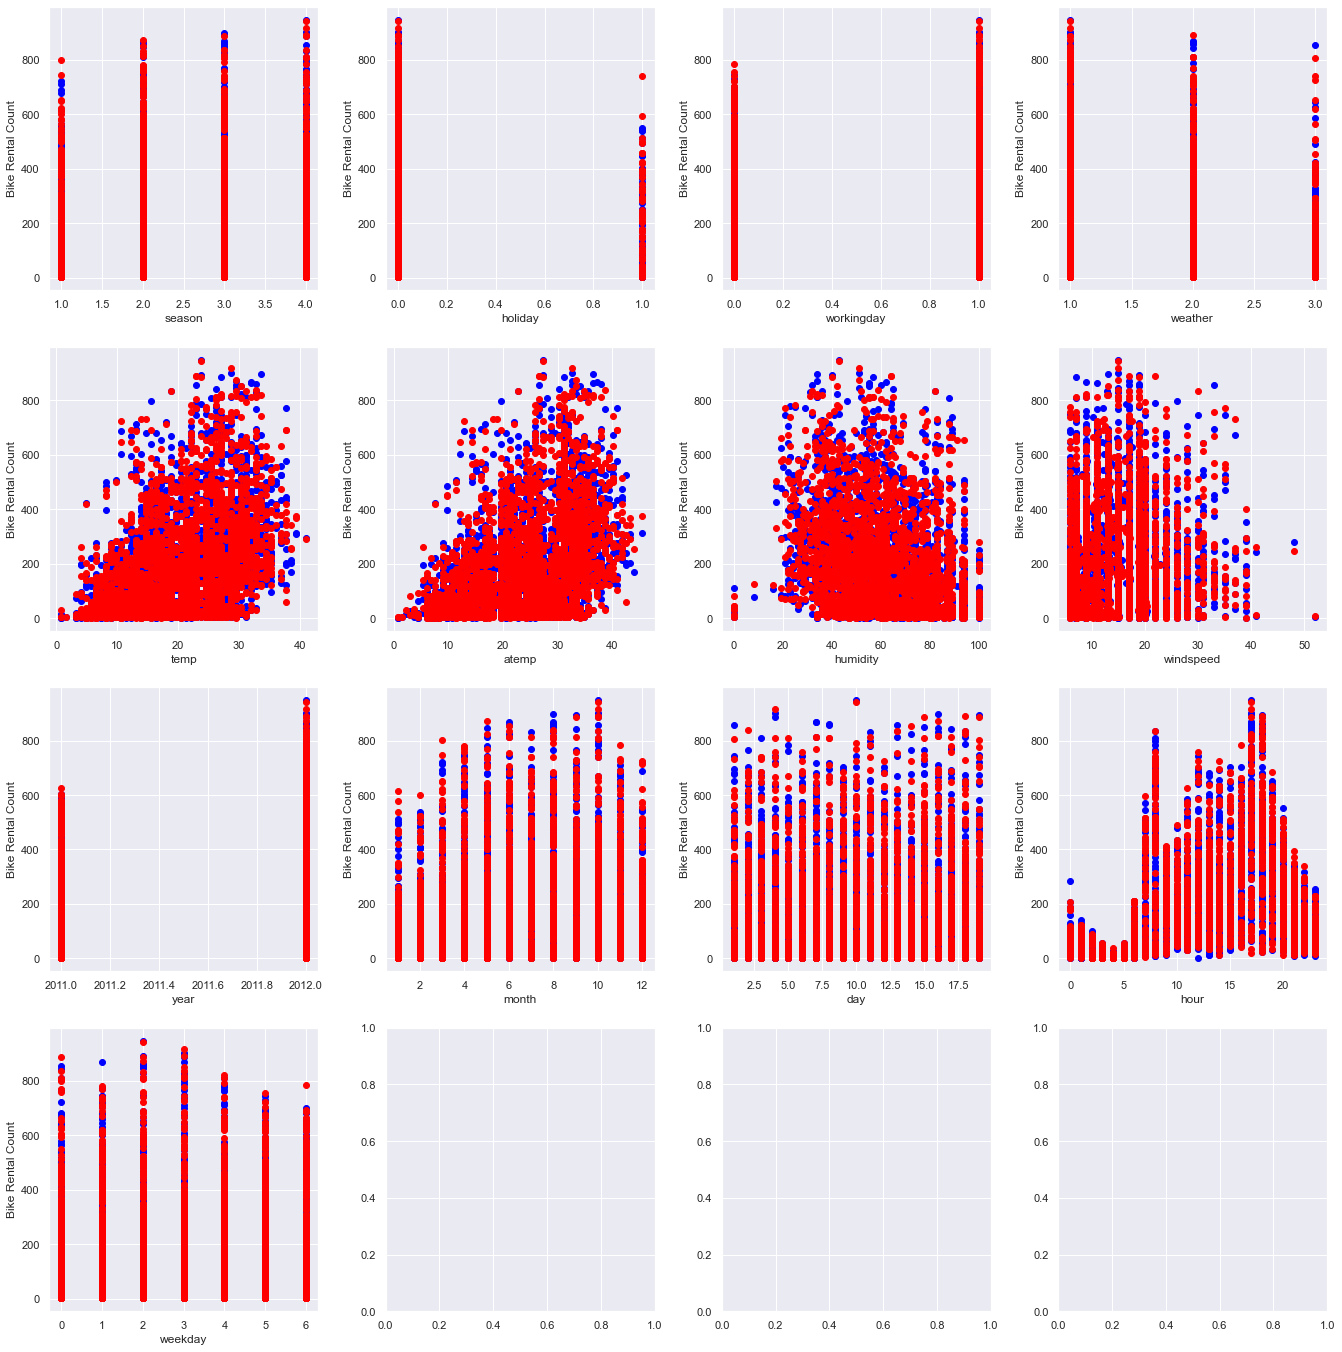

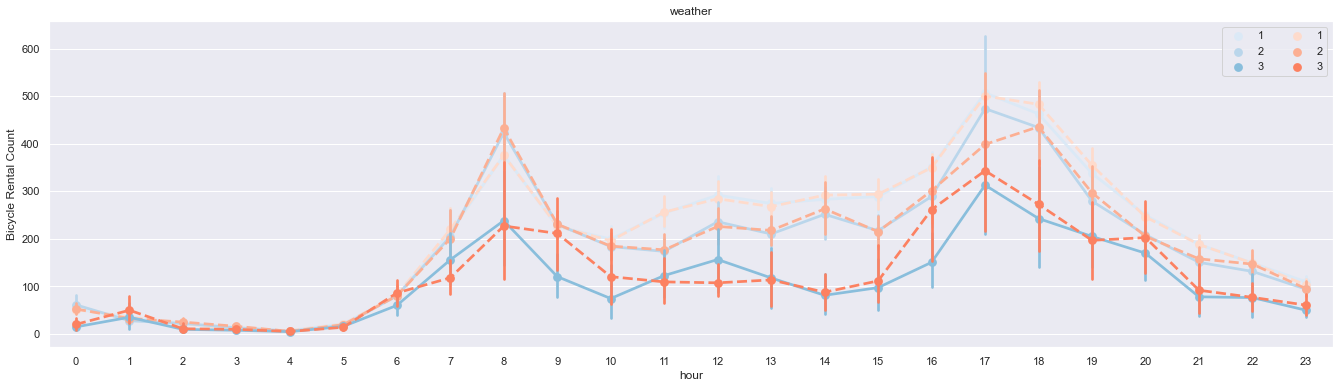

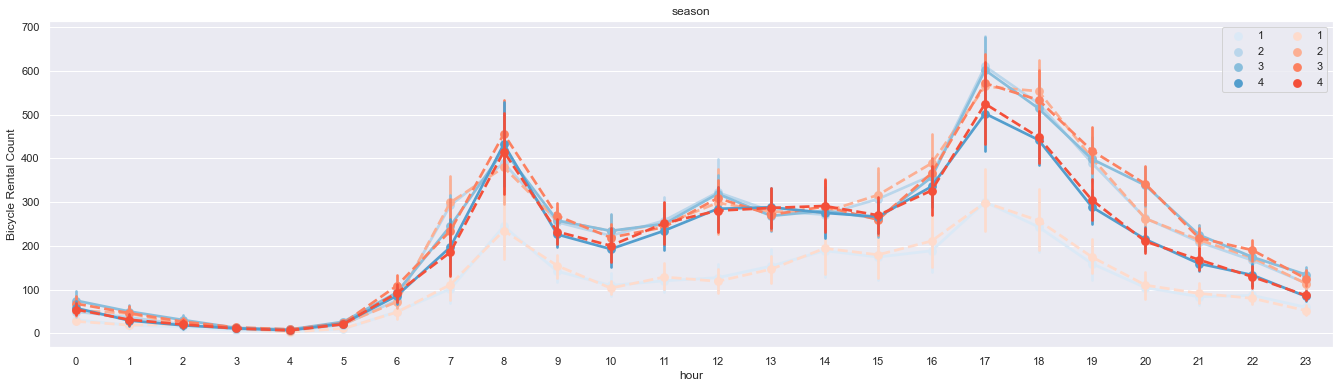

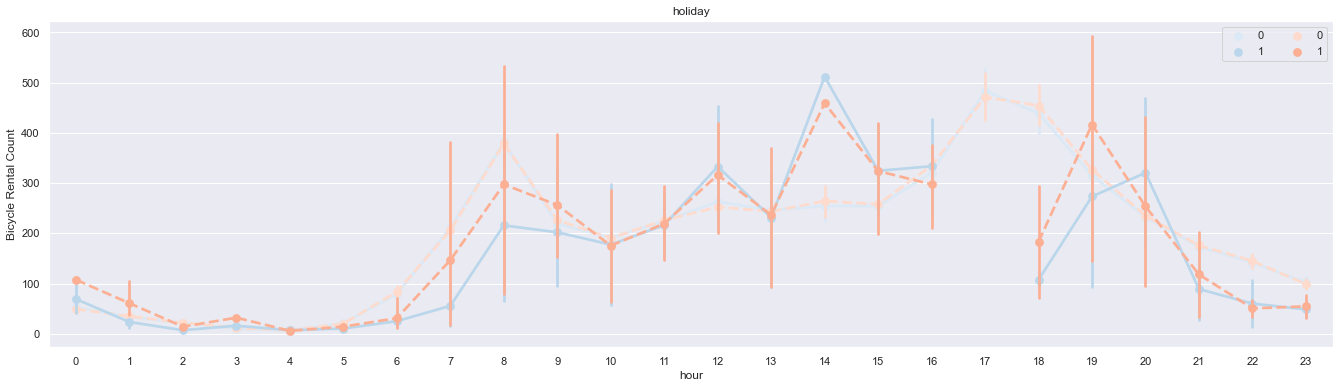

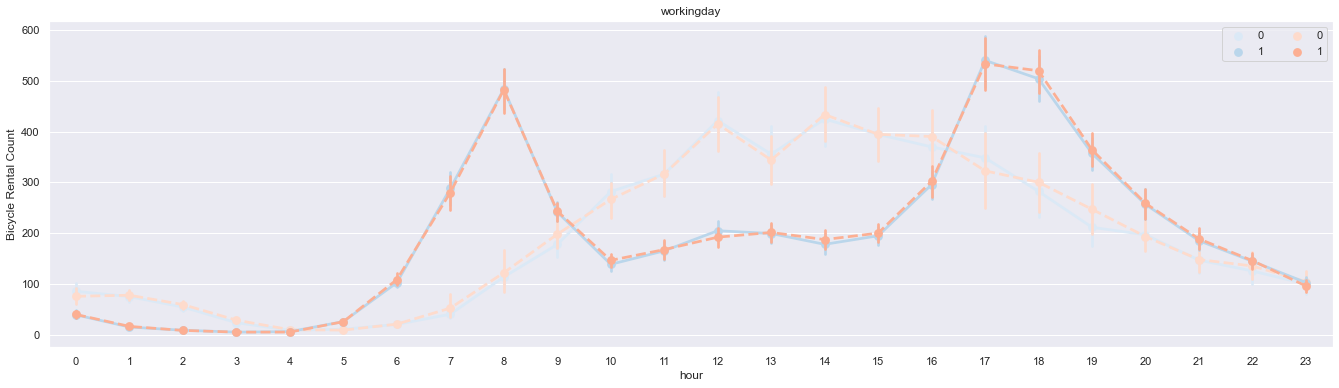

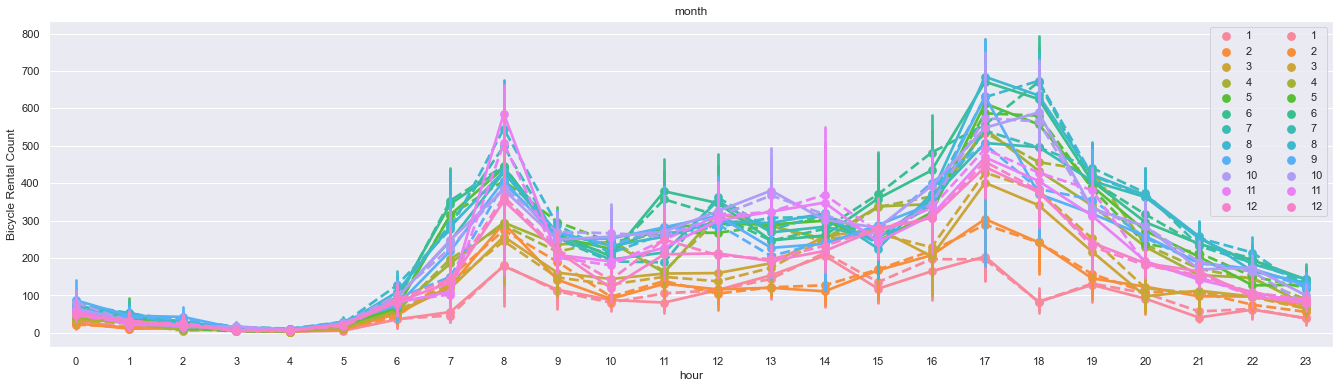

In [ ]:
from sklearn.tree import DecisionTreeRegressor
estimator = DecisionTreeRegressor(random_state=0)

#creating learn curve
train_sizes = np.linspace(0.1,1,20)
lcurve(estimator, x_train_eval, y_train_eval, train_sizes)

#fitting, predicting & scoring model 
estimator.fit(x_train_eval,y_train_eval) 
y_pred = estimator.predict(x_test_eval)
scoring(y_pred, y_test_eval)

#visualize prediction
#features = ['season', 'holiday', 'workingday', 'weather', 'temp', 'atemp','humidity', 'windspeed', 'month', 'day', 'hour']
pred_pair_visualization(x_test=x_test_eval,y_test=y_test_eval,y_pred=y_pred,features = features, fig_collums=4)

### Random Forest Regressor

Next in line is a Random Forest Regressor model, a model type that achieved solid results in the windfill application. Equally so it performs well on the bike rental data, resulting in good scores across the board. As the training and test curve rise simultaniously over adding training size, a healthy learning process seems to exist. Looking at the inclination and development of the test curve, there is even room to hope for marginal improvements in case new data where to be made available in the final application of all available training data without having to split for scoring purposes.  

Learning Curve


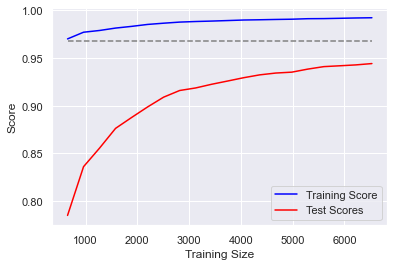

Training score of max training size: 0.9922726784105403
Test score of max training size: 0.9441965765146776
Mean Squared Error Score: 1681.228990191036
Mean Absolute Error Score: 24.93949669360764
Average Errorpercantage: 20.504826649655467 %



Comparison Scatter plots
Pointplots


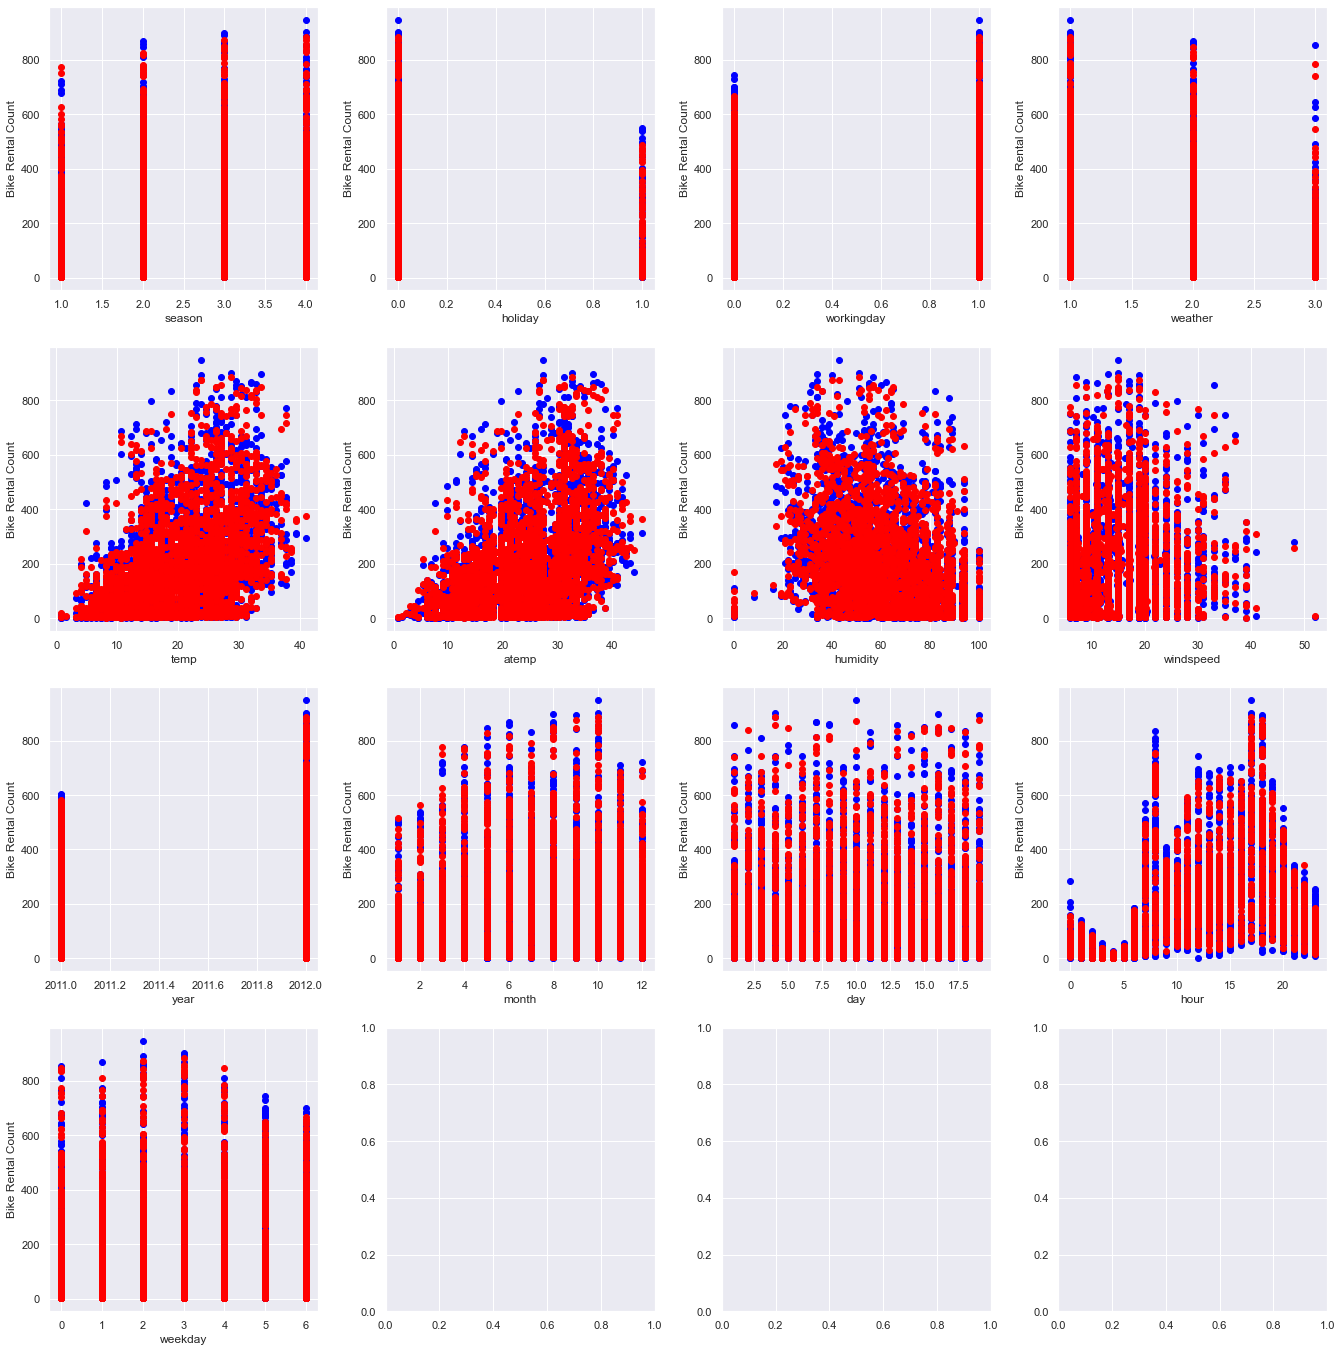

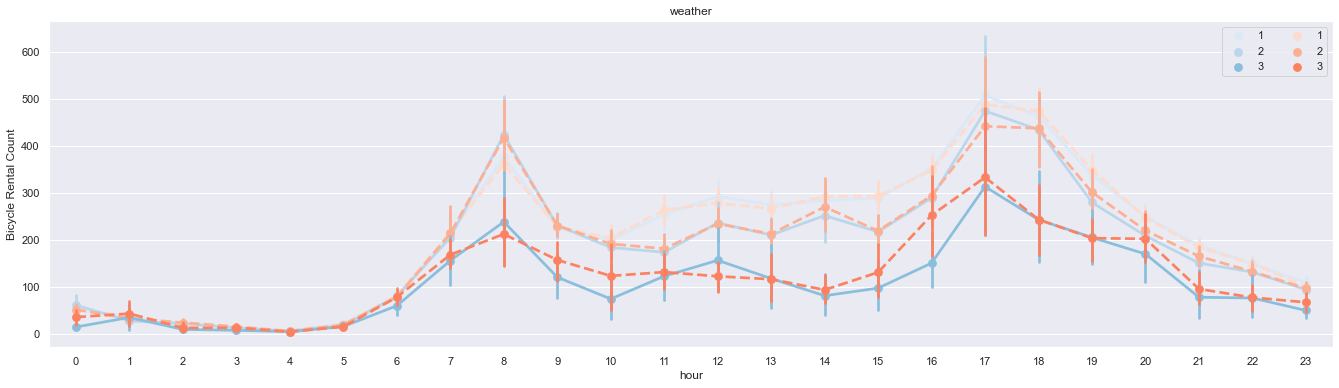

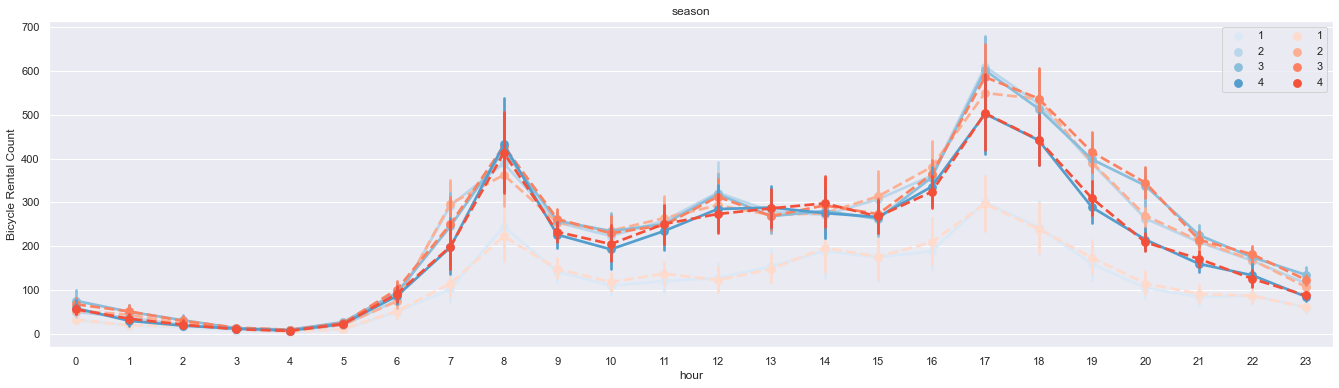

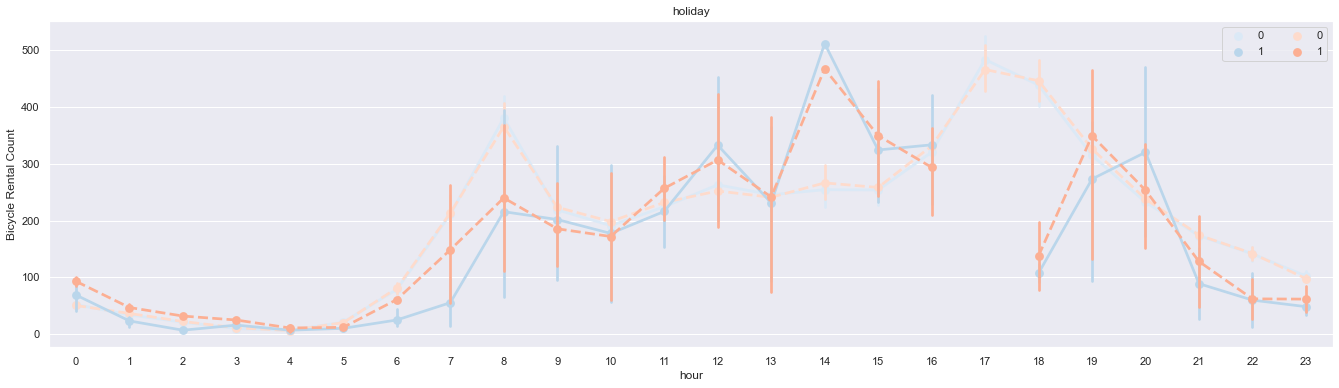

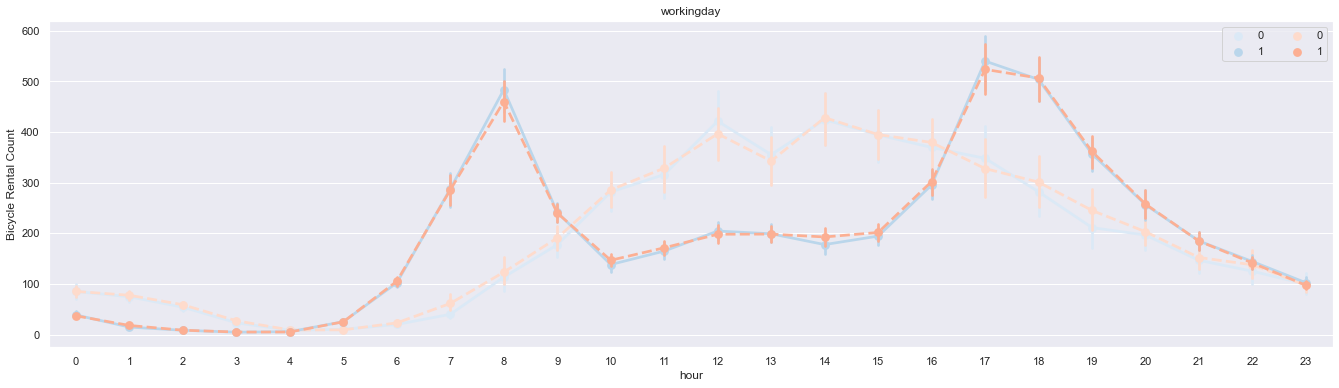

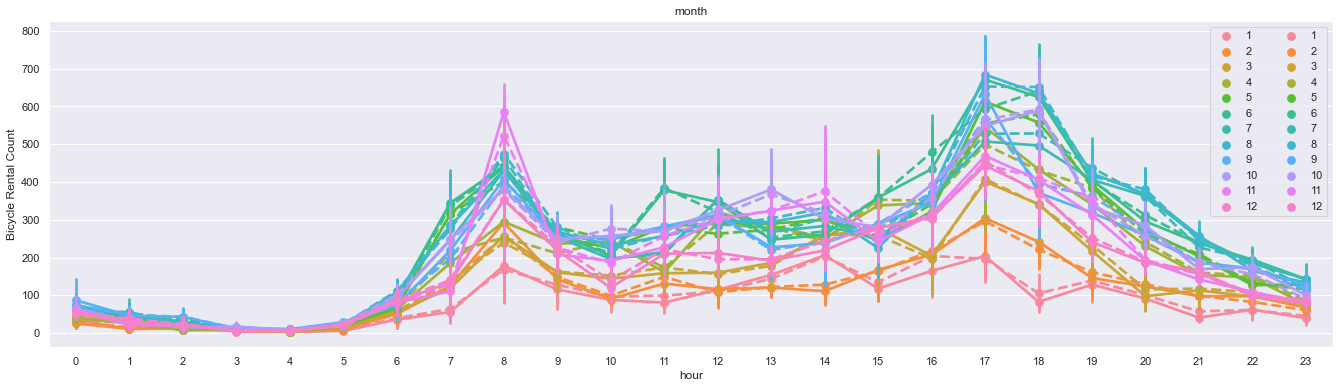

In [ ]:
from sklearn.ensemble import RandomForestRegressor
estimator = RandomForestRegressor(random_state = 0)

#creating learn curve
train_sizes = np.linspace(0.1,1,20)
lcurve(estimator, x_train_eval, y_train_eval, train_sizes)

#fitting, predicting & scoring model 
estimator.fit(x_train_eval,y_train_eval) 
y_pred = estimator.predict(x_test_eval)
scoring(y_pred, y_test_eval)

#visualize prediction
#features = ['season', 'holiday', 'workingday', 'weather', 'temp', 'atemp','humidity', 'windspeed', 'month', 'day', 'hour']
pred_pair_visualization(x_test=x_test_eval,y_test=y_test_eval,y_pred=y_pred,features = features, fig_collums=4)




### Extra Tree Regressor

Last in line is the Extra Tree Regressor Model, a model type similarly to the Random Forest Regressor composed of decision trees. The resulting scores show promising results, placed in the same area as those of the Random Forest, but outperforming it slightly. Equally so the Extra Tree Regressor Model is able to represent the correlations in the data. However the looking at the learning curve, some overfitting behaviour is observable, with a close to perfect Training Score throughtout all training sizes. However the test score rises continiously to the already mentioned good overall performance. Even though the Extra Tree Regressor thus outperforms the Random Forest in scoring, the  overfitting behaviour makes it less solid model and one where less improvement can be expected with future data, compared to the Random Forest Regressor. 

Learning Curve


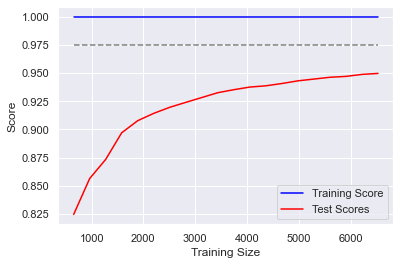

Training score of max training size: 0.9999999988878997
Test score of max training size: 0.9496847453354729
Mean Squared Error Score: 1544.2770133725203
Mean Absolute Error Score: 24.849470977222634
Average Errorpercantage: 20.27644558179422 %



Comparison Scatter plots
Pointplots


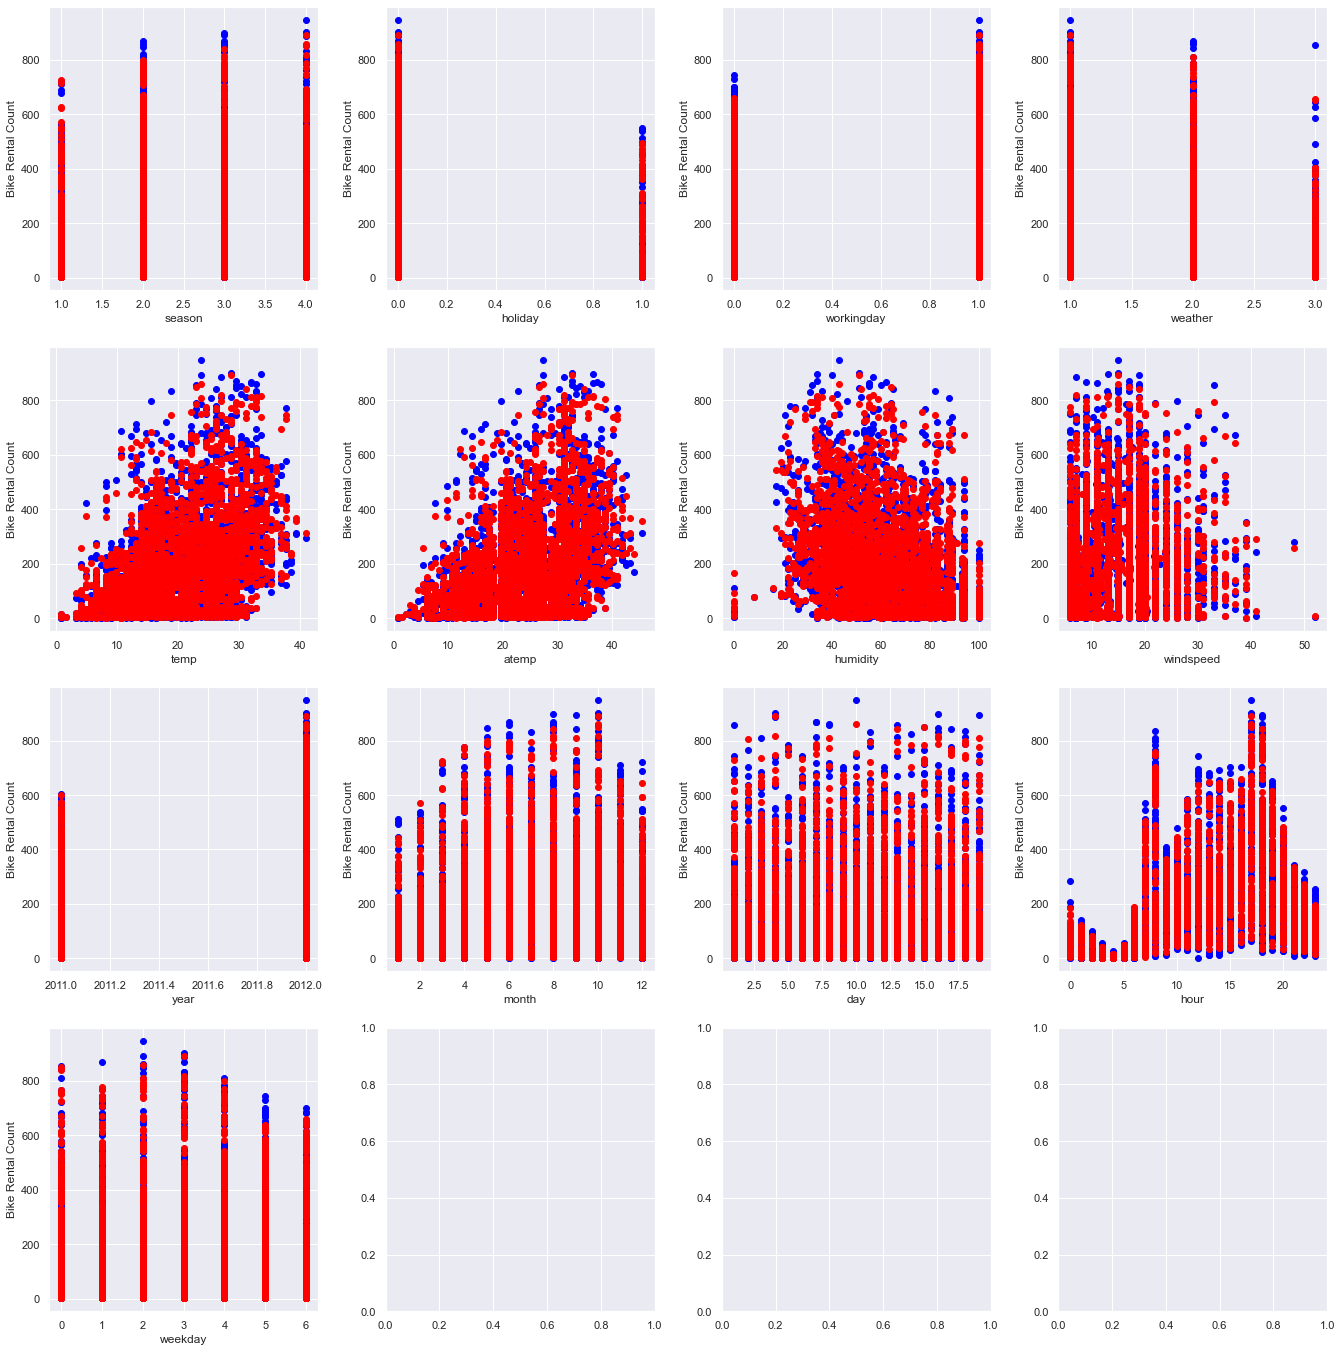

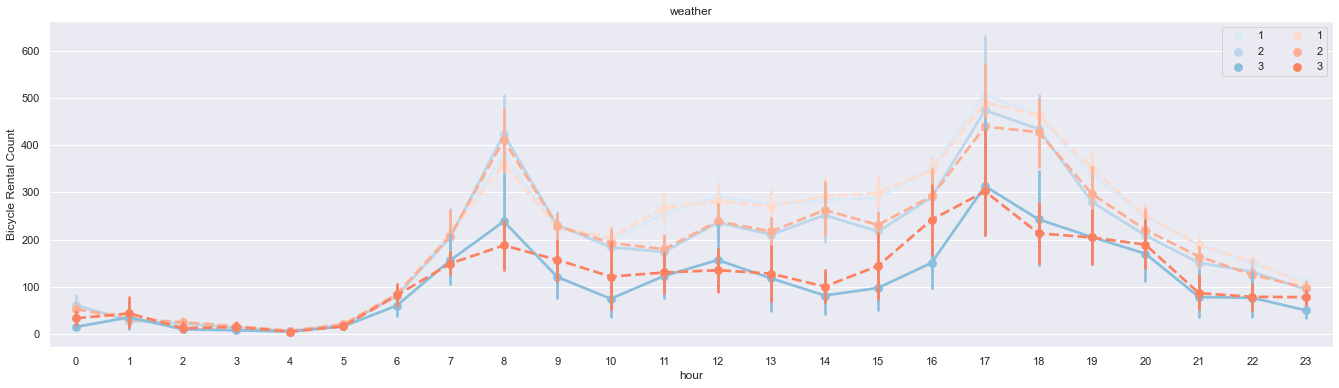

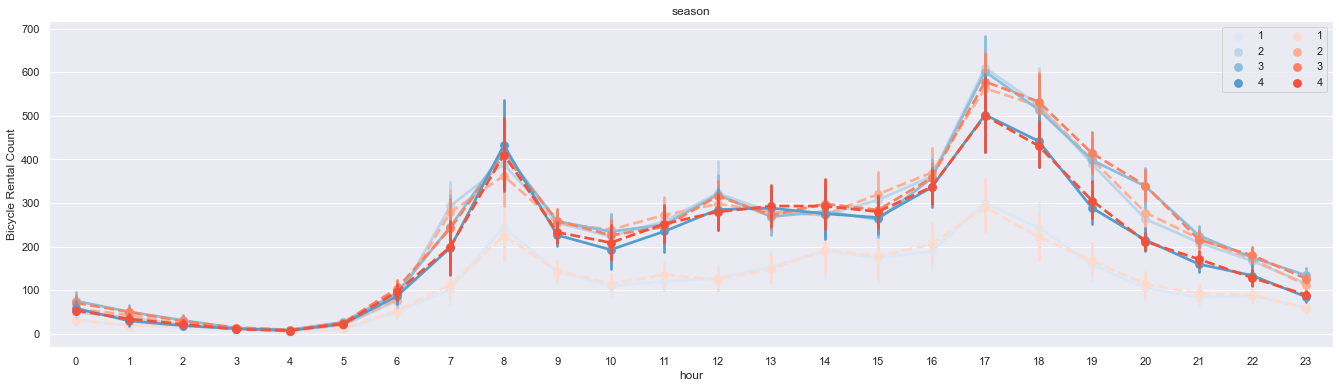

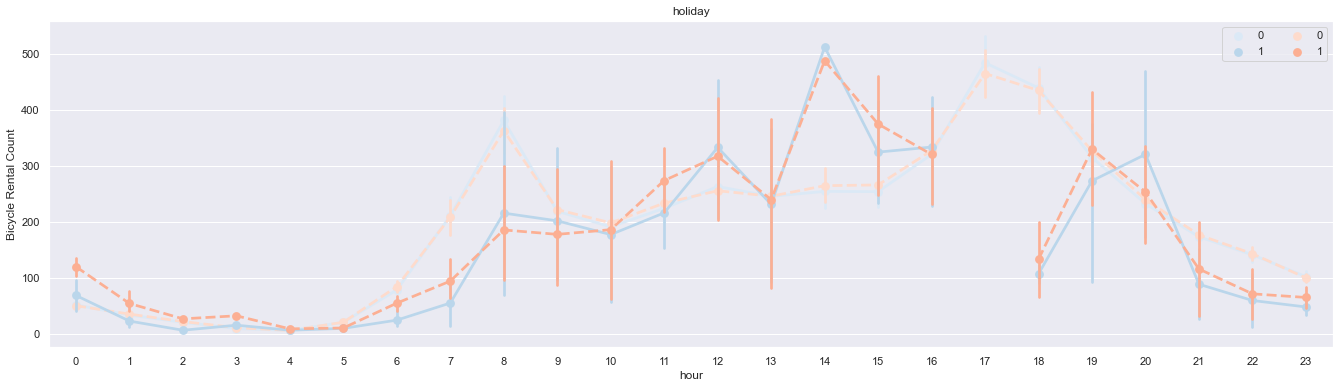

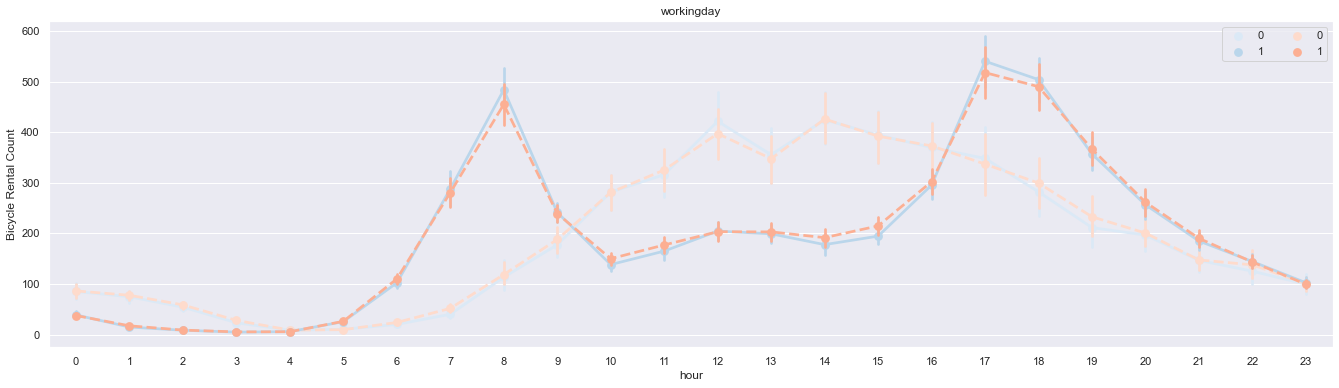

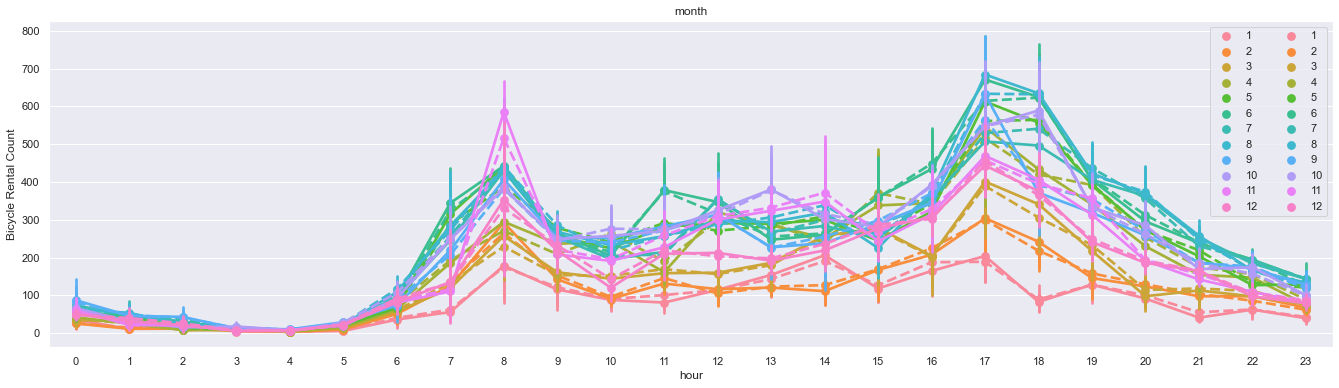

In [ ]:
from sklearn.ensemble import ExtraTreesRegressor
estimator = ExtraTreesRegressor(random_state=0)

#creating learn curve
train_sizes = np.linspace(0.1,1,20)
lcurve(estimator, x_train_eval, y_train_eval, train_sizes)

#fitting, predicting & scoring model 
estimator.fit(x_train_eval,y_train_eval) 
y_pred = estimator.predict(x_test_eval)
scoring(y_pred, y_test_eval)

#visualize prediction
#features = ['season', 'holiday', 'workingday', 'weather', 'temp', 'atemp','humidity', 'windspeed', 'month', 'day', 'hour']
pred_pair_visualization(x_test=x_test_eval,y_test=y_test_eval,y_pred=y_pred,features = features, fig_collums=4)

### Model Choice Discussion

Comparing the different scores, the Random Forest and the Extra Tree Regressor Models emerge as the two main competitors. The scoring results are close to each other, with the Extra Tree Regressor leading by a slight margin. However the Random Forests validation curve seem to have a slightly higher gradient at the maximum data, implying it might benefit more from the remaining training data that had to be used for the testing and scoring in this evaluation. On a performance level, the Extra Tree Model offers a slight benefit, even though due to the relatively small dataset used, that benefit does not factor in significantly in the decision. 

Since these circumstances result in a non obvious decision. Therfor another factor is introduced, which is the understanding of the models working principles themselves by the author and thus by the ability to tune its hyperparameters in the future. Because there is a deeper understanding for the elements that are contained in a Random Forest as it was part of the lecture leading up to this work, the Random Forest Model is used in favor of slightly better performance of the Extra Tree Regressor. 

## Model Application

With the decision on what model to use, the final application is performed. To decide on how to predict the absolute rental count, a comparison between predicting the rental count directly and a summation of the predictions for the casual and registered counts is made. Afterwards the training and test data is brought into its final form and the rental counts added to the test data. As a initial step, the current data is reviewed a last time. 

In [ ]:
#Checking data
display(df_train.head())
display(df_test.head())

#features to be used in the model learning as before
features = ['season', 'holiday', 'workingday', 'weather', 'temp', 'atemp','humidity', 'windspeed', 'year','month', 'day', 'hour', 'weekday']

#Split into test and train for rental count, casual rental count and registered rental count
x_train, x_test, y_train_count, y_test_count, y_train_casual, y_test_casual, y_train_registered, y_test_registered = train_test_split(
    df_train[features],df_train['count'],df_train['casual'],df_train['registered'],test_size=0.25,random_state=0)


display(x_test,y_test_casual,y_test_registered,y_test_count)

datetime  season  holiday  workingday  weather  temp   atemp  \
0 2011-01-01 00:00:00       1        0           0        1  9.84  14.395   
1 2011-01-01 01:00:00       1        0           0        1  9.02  13.635   
2 2011-01-01 02:00:00       1        0           0        1  9.02  13.635   
3 2011-01-01 03:00:00       1        0           0        1  9.84  14.395   
4 2011-01-01 04:00:00       1        0           0        1  9.84  14.395   

   humidity  windspeed  casual  registered  count  year  month  day  hour  \
0        81   7.392646       3          13     16  2011      1    1     0   
1        80   7.062671       8          32     40  2011      1    1     1   
2        80   6.602783       5          27     32  2011      1    1     2   
3        75   6.472870       3          10     13  2011      1    1     3   
4        75   6.222960       0           1      1  2011      1    1     4   

   weekday  
0        5  
1        5  
2        5  
3        5  
4        5

datetime  season  holiday  workingday  weather   temp   atemp  \
0 2011-01-20 00:00:00       1        0           1        1  10.66  11.365   
1 2011-01-20 01:00:00       1        0           1        1  10.66  13.635   
2 2011-01-20 02:00:00       1        0           1        1  10.66  13.635   
3 2011-01-20 03:00:00       1        0           1        1  10.66  12.880   
4 2011-01-20 04:00:00       1        0           1        1  10.66  12.880   

   humidity  windspeed  year  month  day  hour  weekday  
0        56  26.002700  2011      1   20     0        3  
1        56  10.489185  2011      1   20     1        3  
2        56  10.089262  2011      1   20     2        3  
3        56  11.001400  2011      1   20     3        3  
4        56  11.001400  2011      1   20     4        3

season  holiday  workingday  weather   temp   atemp  humidity  \
6639       1        0           1        1  22.96  26.515        60   
7976       2        0           1        2  27.06  29.545        89   
5916       1        0           1        1  17.22  21.210        54   
8051       2        0           1        1  27.88  31.820        44   
5895       1        0           1        1  21.32  25.000        52   
...      ...      ...         ...      ...    ...     ...       ...   
6112       1        0           1        2  13.12  17.425        66   
1917       2        0           1        3  22.14  25.760        52   
5703       1        0           1        2  17.22  21.210        71   
4813       4        0           0        2  20.50  24.240        42   
5125       4        0           1        3  17.22  21.210        94   

      windspeed  year  month  day  hour  weekday  
6639    6.00320  2012      3   13    22        1  
7976   19.00120  2012      6   12    17        1  
5916   32.99750  2012      2    2    17        3  
8051   12.99800  2012      6   15    20        4  
5895   11.00140  2012      2    1    20        2  
...         ...   ...    ...  ...   ...      ...  
6112    7.40216  2012      2   10    22        4  
1917   23.99940  2011      5    6    19        4  
5703   11.00140  2012      1   12    19        3  
4813   22.00280  2011     11   13    15        6  
5125   15.00130  2011     12    7    15        2  

[2722 rows x 13 columns]

6639    24
7976    56
5916    13
8051    89
5895    10
        ..
6112    11
1917    39
5703    17
4813    89
5125     5
Name: casual, Length: 2722, dtype: int64

6639    146
7976    625
5916    437
8051    296
5895    254
       ... 
6112    102
1917    253
5703    313
4813    221
5125     25
Name: registered, Length: 2722, dtype: int64

6639    170
7976    681
5916    450
8051    385
5895    264
       ... 
6112    113
1917    292
5703    330
4813    310
5125     30
Name: count, Length: 2722, dtype: int64

Then the Models to predict the casual and the registered bike rental counts are created and trained. 

Learning Curve


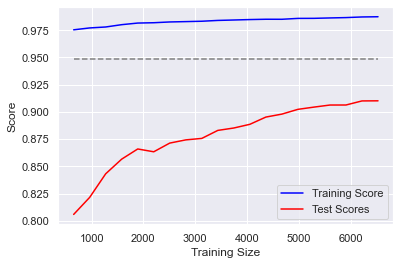

Training score of max training size: 0.9873775254782788
Test score of max training size: 0.910147934640119
Mean Squared Error Score: 190.9214273695812
Mean Absolute Error Score: 8.234441587068332
Average Errorpercantage: 45.827864505652286 %



Comparison Scatter plots
Pointplots


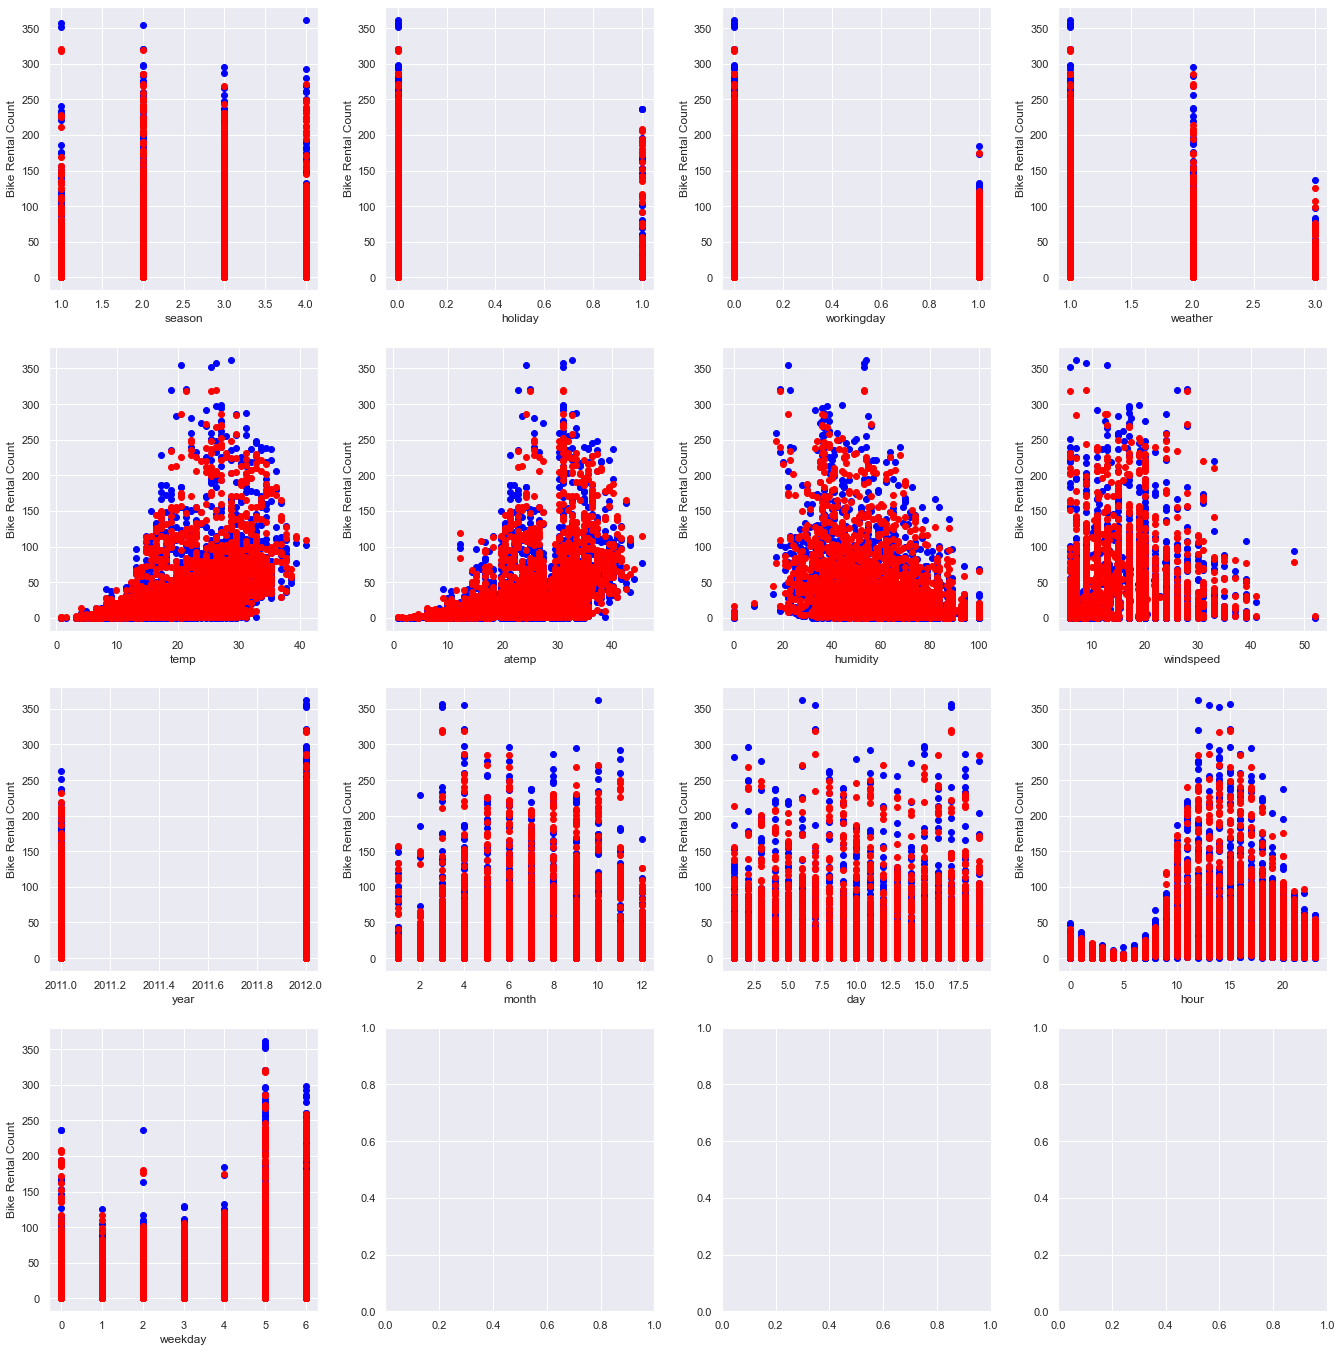

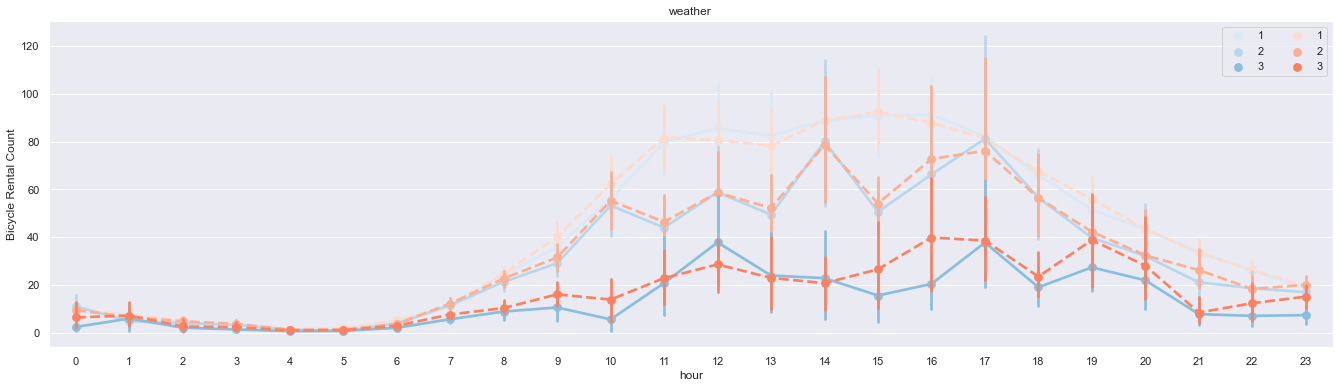

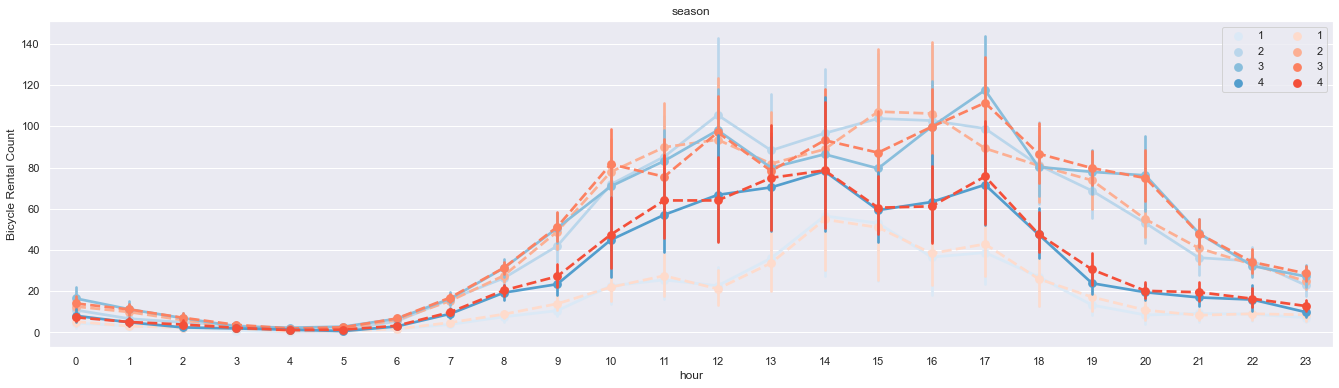

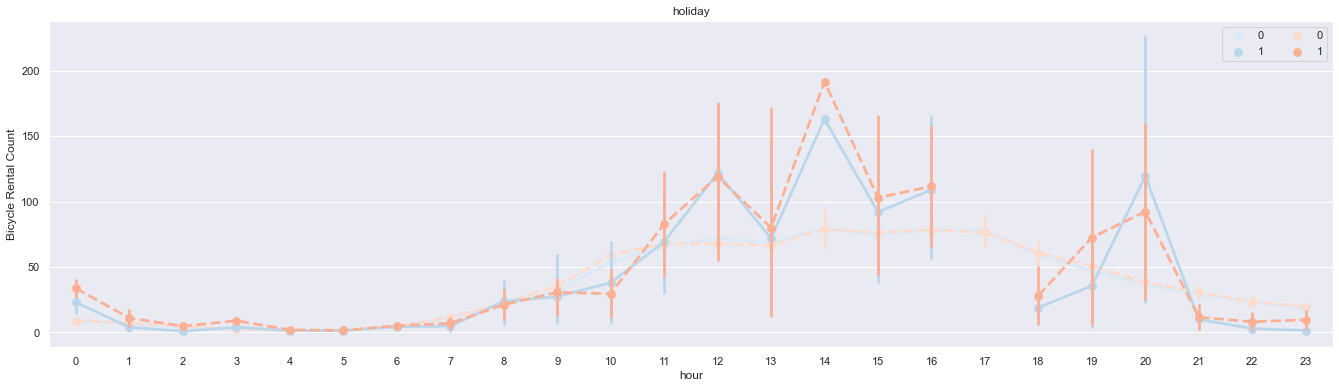

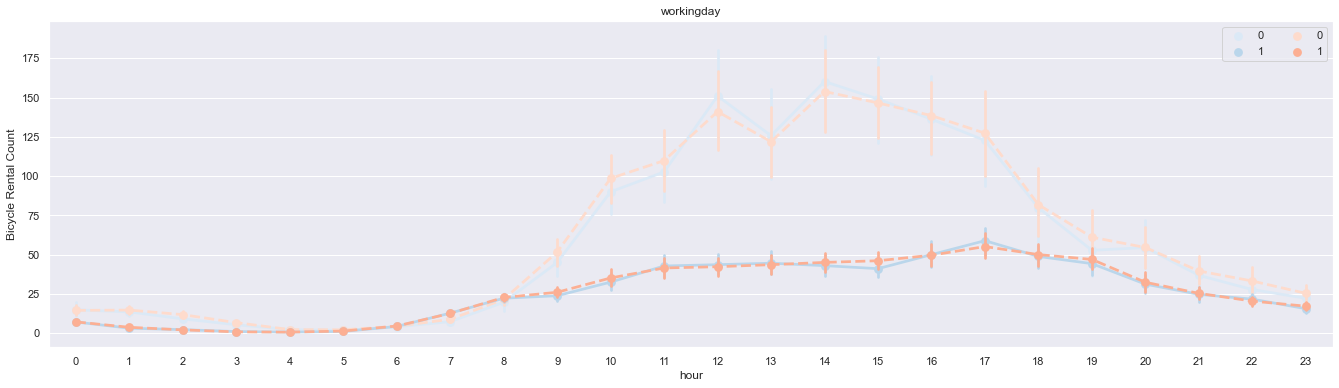

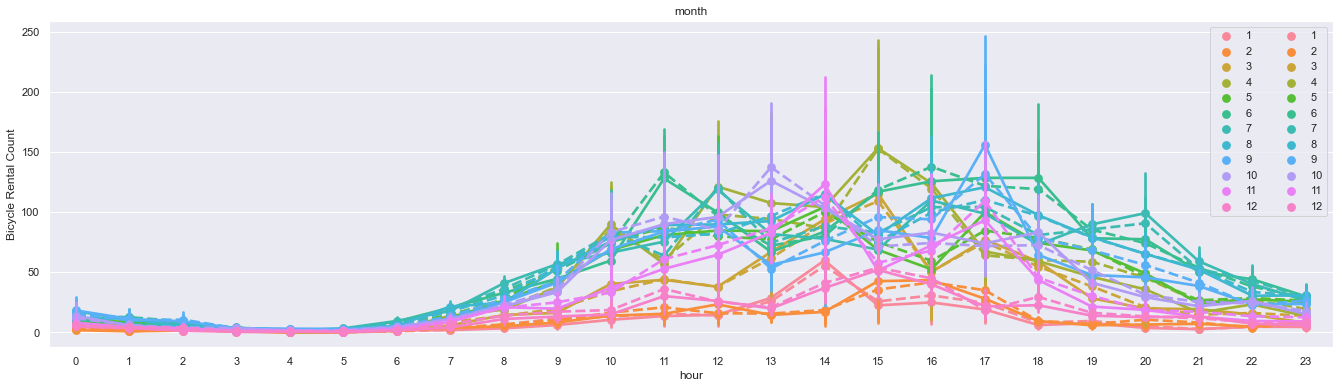

Learning Curve


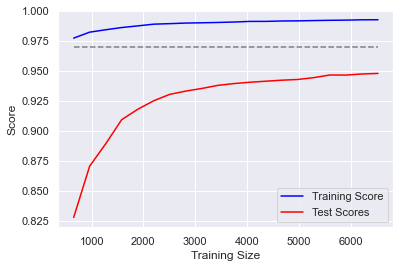

Training score of max training size: 0.9926544032288426
Test score of max training size: 0.9478821906571053
Mean Squared Error Score: 1114.3971613152094
Mean Absolute Error Score: 19.93613886847906
Average Errorpercantage: 20.220381378518393 %



Comparison Scatter plots
Pointplots


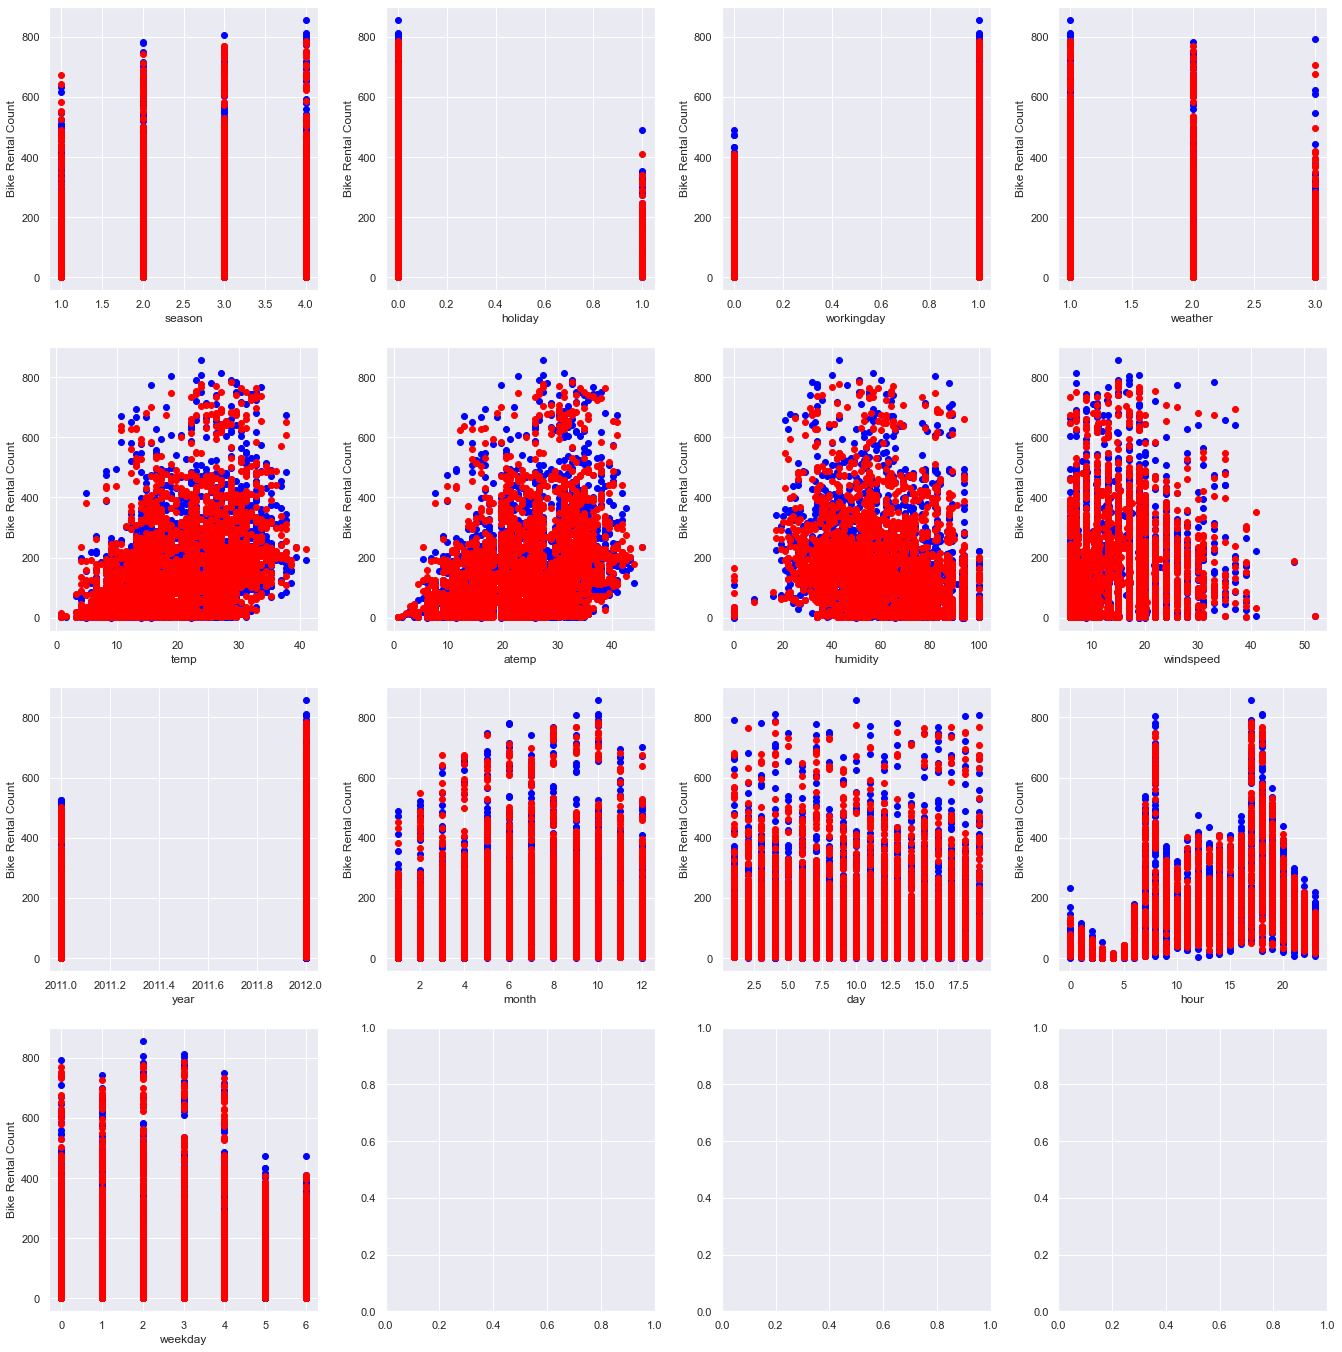

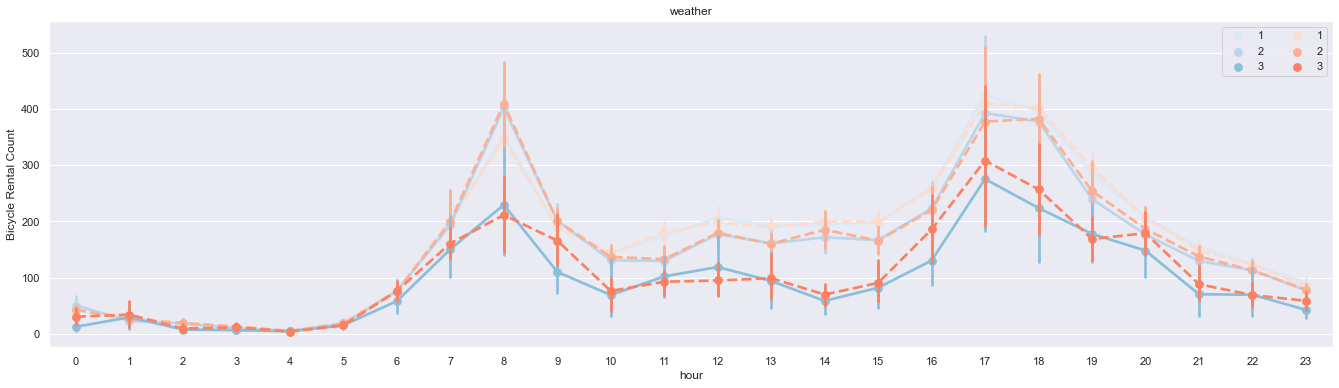

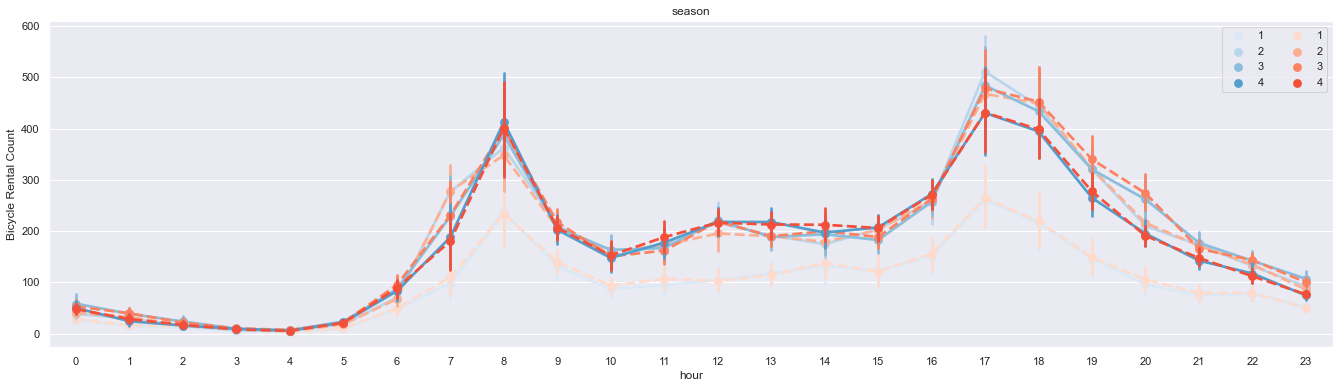

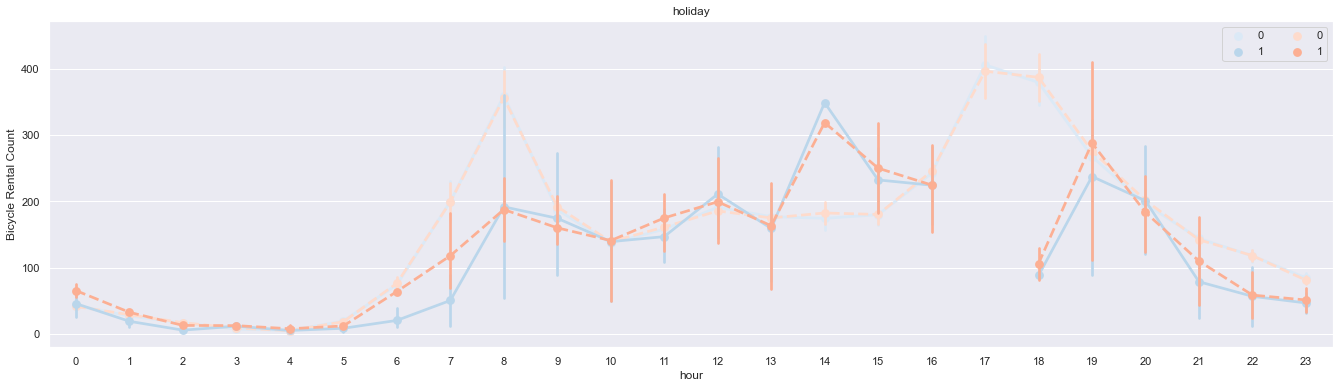

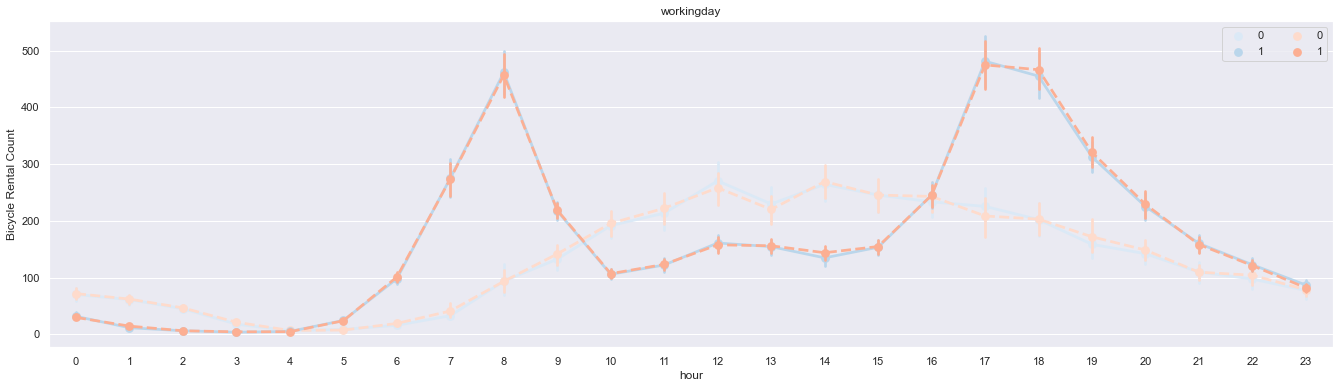

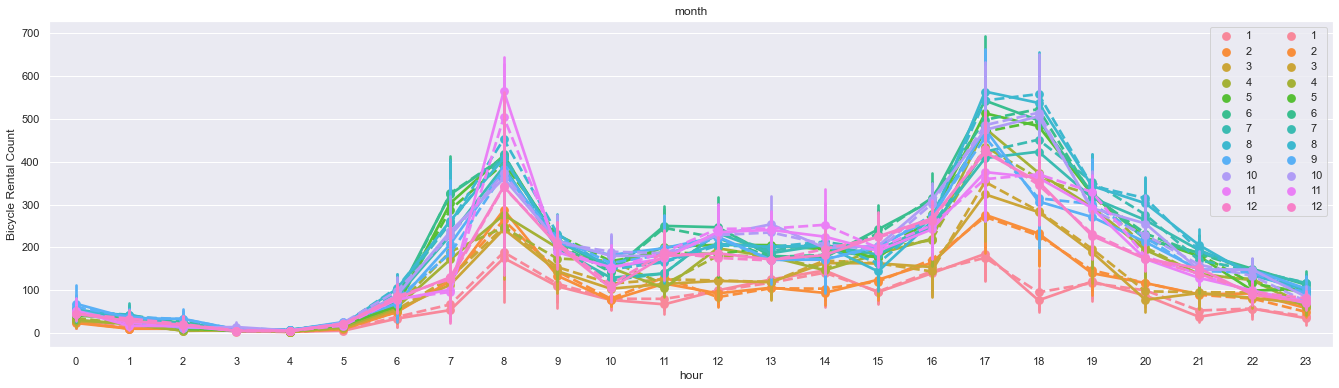

In [ ]:
#training models for registered and casual rentals

estimator_casual = RandomForestRegressor(random_state=0)
estimator_registered = RandomForestRegressor(random_state = 0)

#fitting, predicting & scoring model for casual rentals
estimator_casual.fit(x_train,y_train_casual) 
y_pred_casual = estimator_casual.predict(x_test)
#creating learn curve
train_sizes = np.linspace(0.1,1,20)
lcurve(estimator_casual, x_train, y_train_casual, train_sizes)
#scoring
scoring(y_pred_casual, y_test_casual)

#visualize prediction
pred_pair_visualization(x_test=x_test,y_test=y_test_casual,y_pred=y_pred_casual,features = features, fig_collums=4)


#fitting, predicting & scoring model for registered rentals
estimator_registered.fit(x_train,y_train_registered) 
y_pred_registered = estimator_registered.predict(x_test)
#creating learning curve
train_sizes = np.linspace(0.1,1,20)
lcurve(estimator_registered, x_train, y_train_registered, train_sizes)
#scoring
scoring(y_pred_registered, y_test_registered)

#visualize prediction
pred_pair_visualization(x_test=x_test,y_test=y_test_registered,y_pred=y_pred_registered,features = features, fig_collums=4)



The sum of these models is compared to a seperate prediction model for the absolute rental count and both are scored for comparison. The results show, that the summed variant performs slightly better than the seperate prediction model, likely due to the both models being able to better represent the characteristics and differences in the casual and registered rental data. Thus the combined model is used for the absolute rental count. 

In [ ]:
#Training of model for direct count prediction
display('Scoring for inmediate absolute count prediction')
estimator_count = RandomForestRegressor(random_state = 0)
estimator_count.fit(x_train,y_train_count) 
y_pred_count = estimator_count.predict(x_test)
scoring(y_pred_count, y_test_count)

#Summing casual & registered counts to absolute count from individual prediction
y_pred_countSummed = y_pred_registered+y_pred_casual # sum for absolute rental count
display('Scoring for summed total bycical rental count')
scoring(y_pred_countSummed, y_test_count)

#Scoring RMSLE for summed (registered+casual) drivers
RMSLE = mean_squared_log_error(y_true = y_test_count, y_pred = y_pred_countSummed, squared=False)
display('Root mean squared log Error:',RMSLE)


'Scoring for inmediate absolute count prediction'

Mean Squared Error Score: 1681.228990191036
Mean Absolute Error Score: 24.93949669360764
Average Errorpercantage: 20.504826649655467 %




'Scoring for summed total bycical rental count'

Mean Squared Error Score: 1511.4336659808966
Mean Absolute Error Score: 23.72421013960323
Average Errorpercantage: 19.864365530880583 %




'Root mean squared log Error:'

0.32137323971529397

In addition to that, the Root Mean Squared Log Error is calculated, as that is the score on which the bike sharing demand kaggel challange (https://www.kaggle.com/competitions/bike-sharing-demand/overview/evaluation) was evaluated. The result compared to the current challange leaderboard appears to be very good, with a score better than the current first place. Since these scores however are computed against the actual test set data, while the score in this work is computed against the extracted data including the windspeed filling, the actual score can be expected to be slightly worse. Nonetheless, the results for the Random Forest Regressor thus seem to be comparatively solid, giving no indication of wildly unrealistic model behaviour.

In addition to the conventional scoring methods, visualizations where created to give a more intuitive understanding of the models error behaviour. The first is a common histogram, showing the the occurence of errors over the value of the error as a histogram. The resulting plot implies a exponential decay from high occurences of small errors, to an increasingly lower occurence of higher errors, reaching to errors of over 100. It could be assumed, that these high errors occoure because of features of the real rental behaviours that have not been included in the models. One possible example might be irregular events like extreme weather conditions, that are not reflected in the available data. 
The second visualization shows an averaged relation between rentals and their corresponding average errors. As might be expected, it is visible that the error increases corresponding to the increase of rentals, making prediction harder. While the calculated error avaerage remains fairly consistent in its development initially, it starts to exibit a increasingly unstable behaviour towards the higher rental counts. Plotting the histogram of the distribution of the related test rental counts shows, that the instability correlates with the dropping amount of cases for said rental counts, thus basing the averages on less (and less representative) data. Vice versa, the decrease of cases with a lot of rentals equally existent in the training data (as shown in Chapter 1), probably leads to the lesser accuracy of the model in these areas.

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


[Text(0.5, 0, 'rentals'), Text(0, 0.5, 'rental count')]

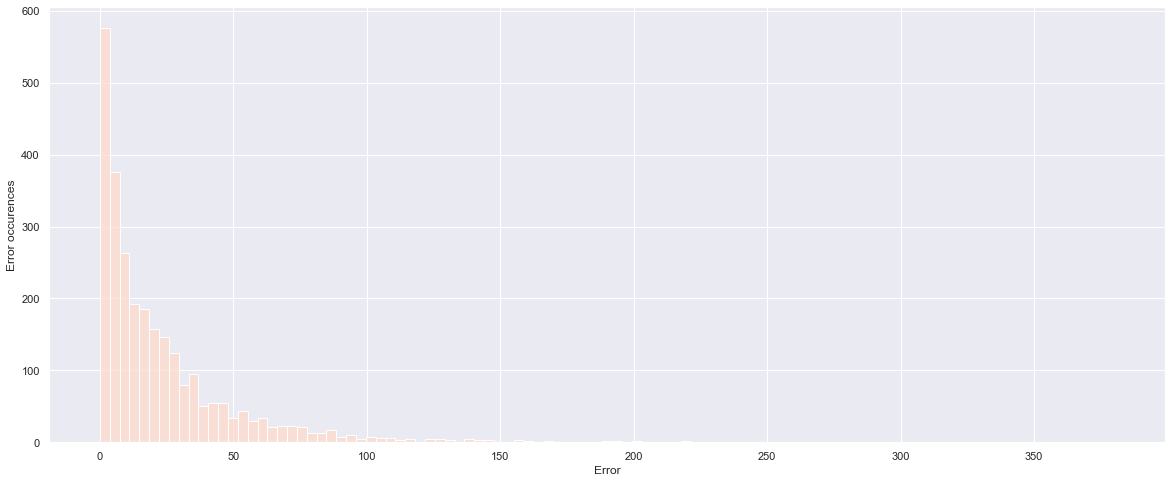

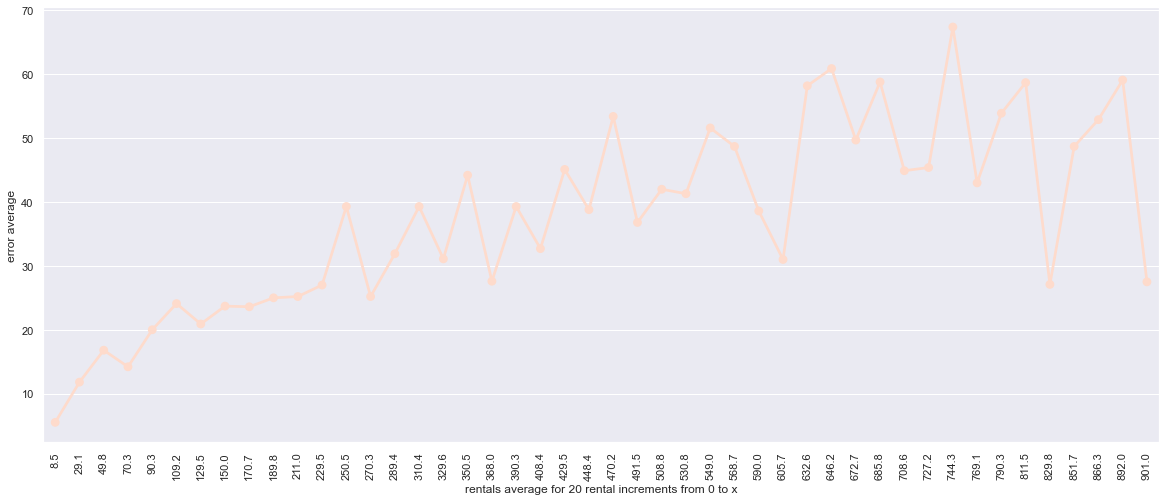

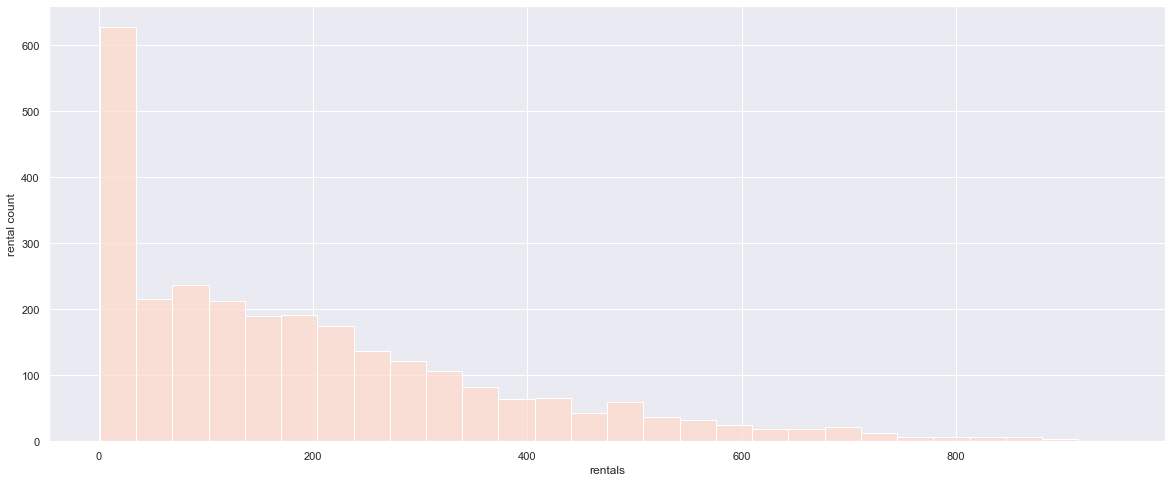

In [ ]:

#Error histogram
error = abs(y_test_count-y_pred_countSummed)
plt.figure(figsize=(20,8))
ax = sns.histplot(error)
ax.set(xlabel='Error', ylabel='Error occurences')


#plot average error over averaged rentals
#merging error and corresponding actual count into single dataframe 
data_error_eval = np.array([y_test_count,error])
data_error_eval = np.transpose(data_error_eval)

#renaming columns of dataframe
df_error_eval = pd.DataFrame({'Absolute Rentals' : data_error_eval[:,0],'Prediction Error' : data_error_eval[:,1]})

#sort array by rentals(low to high)
df_error_eval = df_error_eval.sort_values(by=['Absolute Rentals'])
df_error_eval = df_error_eval.reset_index()

df_average_final = pd.DataFrame(columns=['rentals average','error average'])

#settings
ilower = 0
iold = ilower
steps = 20 #summing together steps of 20 rental counts -> 0-20 rentals,20-40 etc.

#loop summing all cases inside each of the 20 count step increments to average counts & average errors for visualization
for i in range(ilower,int(df_error_eval['Absolute Rentals'].max()),steps):
    
    df_average = df_error_eval[df_error_eval['Absolute Rentals'].between(iold, i)]
    rentals_average = df_average[['Absolute Rentals']].mean()
    error_average = df_average[['Prediction Error']].mean()

    rentals_average = rentals_average.iat[0]
    error_average = error_average.iat[0]

    #display(rentals_average, error_average)
    df_average_final.loc[len(df_average_final)] = [rentals_average, error_average]
    iold = i

#drop not a number filled rows and round
df_average_final = df_average_final[df_average_final['rentals average'].notna()]
df_average_final = df_average_final.round(1)
#display(df_average_final)

#plot
plt.figure(figsize=(20,8))
ax = sns.pointplot(df_average_final['rentals average'],df_average_final['error average'])
ax.set(xlabel='rentals average for 20 rental increments from 0 to x')
plt.xticks(rotation=90)

#Error histogram
plt.figure(figsize=(20,8))
ax = sns.histplot(y_test_count)
ax.set(xlabel='rentals', ylabel='rental count')


The shown error behaviour therfore exibits no unexpected development, therefor not giving any indication of inconsistent model behaviour. Thus the models are fit onto the complete training data and used to predict the missing test data counts from the by the challange predefined test data set. 

In [ ]:
display('Training Data',df_train.head())
display('Test Data', df_test.head())

#Defining Training data
features = ['season', 'holiday', 'workingday', 'weather', 'temp', 'atemp','humidity', 'windspeed', 'year','month', 'day', 'hour','weekday']
x_train = df_train[features]

#fitting, predicting & scoring model for casual rentals
estimator_casual.fit( x_train, df_train['casual']) 
y_pred_casual = estimator_casual.predict(df_test[features])
df_test['casual']= y_pred_casual.round()

#fitting, predicting & scoring model for registered rentals
estimator_registered.fit(x_train, df_train['registered']) 
y_pred_registered = estimator_registered.predict(df_test[features])
df_test['registered'] = y_pred_registered.round()

#create absolute rental count from casual and registered counts
df_test['count'] = df_test['casual'] + df_test['registered']

display('Test Data Filled Up',df_test.head())

'Training Data'

datetime  season  holiday  workingday  weather  temp   atemp  \
0 2011-01-01 00:00:00       1        0           0        1  9.84  14.395   
1 2011-01-01 01:00:00       1        0           0        1  9.02  13.635   
2 2011-01-01 02:00:00       1        0           0        1  9.02  13.635   
3 2011-01-01 03:00:00       1        0           0        1  9.84  14.395   
4 2011-01-01 04:00:00       1        0           0        1  9.84  14.395   

   humidity  windspeed  casual  registered  count  year  month  day  hour  \
0        81   7.392646       3          13     16  2011      1    1     0   
1        80   7.062671       8          32     40  2011      1    1     1   
2        80   6.602783       5          27     32  2011      1    1     2   
3        75   6.472870       3          10     13  2011      1    1     3   
4        75   6.222960       0           1      1  2011      1    1     4   

   weekday  
0        5  
1        5  
2        5  
3        5  
4        5

'Test Data'

datetime  season  holiday  workingday  weather   temp   atemp  \
0 2011-01-20 00:00:00       1        0           1        1  10.66  11.365   
1 2011-01-20 01:00:00       1        0           1        1  10.66  13.635   
2 2011-01-20 02:00:00       1        0           1        1  10.66  13.635   
3 2011-01-20 03:00:00       1        0           1        1  10.66  12.880   
4 2011-01-20 04:00:00       1        0           1        1  10.66  12.880   

   humidity  windspeed  year  month  day  hour  weekday  
0        56  26.002700  2011      1   20     0        3  
1        56  10.489185  2011      1   20     1        3  
2        56  10.089262  2011      1   20     2        3  
3        56  11.001400  2011      1   20     3        3  
4        56  11.001400  2011      1   20     4        3

'Test Data Filled Up'

datetime  season  holiday  workingday  weather   temp   atemp  \
0 2011-01-20 00:00:00       1        0           1        1  10.66  11.365   
1 2011-01-20 01:00:00       1        0           1        1  10.66  13.635   
2 2011-01-20 02:00:00       1        0           1        1  10.66  13.635   
3 2011-01-20 03:00:00       1        0           1        1  10.66  12.880   
4 2011-01-20 04:00:00       1        0           1        1  10.66  12.880   

   humidity  windspeed  year  month  day  hour  weekday  casual  registered  \
0        56  26.002700  2011      1   20     0        3     2.0        12.0   
1        56  10.489185  2011      1   20     1        3     1.0         6.0   
2        56  10.089262  2011      1   20     2        3     1.0         4.0   
3        56  11.001400  2011      1   20     3        3     1.0         2.0   
4        56  11.001400  2011      1   20     4        3     1.0         2.0   

   count  
0   14.0  
1    7.0  
2    5.0  
3    3.0  
4    3.0

## Conclusion



With the filling of the test data set, the challange is completed. The Random Forest Regressor Models for casual and registered rentals are able to depict the patterns visible in the data with suficcient precision to make predictions. However there are also cases of high errors, making it important to look at individual predictions in the context of each day when using such a model in real life application. Specifically in cases of irregular events like festive days, or unforseen weather events, the developed models are not able to predict for the changed boundry conditions or rare combinations in feature values. That weakness increases in the high rentals area, where model precision drops. To further improve the models beaviour, additional data might increase the model performance specifically in these high rentals areas. Furthermore alternative models could be investigated for use in these higher usage/rentals cases, to show weather more robust models are be able to get a more continious performance with lower error peaks. 

Overall the developt models exhibit a solid performance by common scoring standards, with a visually validated behaviour. Thus these models could be an supporting aid in making strategic decisions for the placement of rental bikes in the Washington D.C. Area. The real value of these models however depends on the precision, with which bike rentals are otherwise predicted, e.g. depending on the current benchmark. 